## C03 - W05 - Final assignment - IBM AI Engineering Professional Certificate

---

We will be using concrete_data.csv dataset to build a deep learning model using Keras library

The main tasks are:

- A. Build a baseline model
- B. Normalize the data (and do A again)
- C. Increate the number of epochs (and do B again)
- D. Increase the number of hidden layers (and do B again)

Please note that at the end of the notebook you'll find a table containing al results and conclusions.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from tensorflow import keras
import keras.models

Using TensorFlow backend.


In [3]:
# The code was removed by Watson Studio for sharing.

df_concrete = pd.read_csv(body)

In [4]:
print(df_concrete.shape)
df_concrete.head()

(1030, 9)


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df_concrete.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
df_concrete.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

Indeed the dataset is clean, and the shape is (1030,9) as per learning notebooks in the course.
Let's start with the final assignment tasks using keras.

### A. Build a baseline model

Use the Keras library to build a neural network with the following:

- One hidden layer of 10 nodes, and a ReLU activation function
- Use the adam optimizer and the mean squared error as the loss function.
1. Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the train_test_splithelper function from Scikit-learn.
2. Train the model on the training data using 50 epochs.
3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength. You can use the mean_squared_error function from Scikit-learn.
4. Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors.
5. Report the mean and the standard deviation of the mean squared errors.

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [8]:
a = 50; # number of times we run the loop to get the mean and std MSRE
b = 50; # number of epoch used

In [9]:
concrete_data_columns = df_concrete.columns

X = df_concrete[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
y = df_concrete['Strength'] # Strength column

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, shuffle=True);

In [11]:
# define regression model

def regression_model():
    
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(X.shape[1],)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [12]:
model = regression_model()
something = model.fit(X_train, y_train, epochs=b, verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
721/721 [==============================] - 1s 1ms/sample - loss: 18383.3195
Epoch 2/50
721/721 [==============================] - 0s 150us/sample - loss: 3175.1283
Epoch 3/50
721/721 [==============================] - 0s 163us/sample - loss: 893.2433
Epoch 4/50
721/721 [==============================] - 0s 169us/sample - loss: 796.2474
Epoch 5/50
721/721 [==============================] - 0s 189us/sample - loss: 751.8923
Epoch 6/50
721/721 [==============================] - 0s 164us/sample - loss: 717.0343
Epoch 7/50
721/721 [==============================] - 0s 175us/sample - loss: 682.5508
Epoch 8/50
721/721 [==============================] - 0s 150us/sample - loss: 650.1167
Epoch 9/50
721/721 [==============================] - 0s 162us/sample - loss: 621.9851
Epoch 10/50
721/721 [===========================

In [13]:
from contextlib import suppress
import os

filename = 'trainedModel.h5'

# Delete a duplicate file if exists.
with suppress(OSError):
    os.remove(filename)
    
model.save(filename)

Text(0, 0.5, 'Pred values, y_hat')

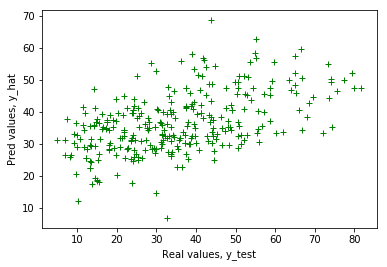

In [14]:
y_hat = model.predict(X_test);
plt.plot(y_test,y_hat,'+g')
plt.xlabel('Real values, y_test')
plt.ylabel('Pred values, y_hat')

In [15]:
metrics = model.evaluate(X_test, y_test, verbose = 1)
print("test MRSE = ", np.round(metrics, decimals = 2))

309/309 [==============================] - 0s 434us/sample - loss: 211.0693
test MRSE =  211.07


In [16]:
print(something.history.keys())

dict_keys(['loss'])


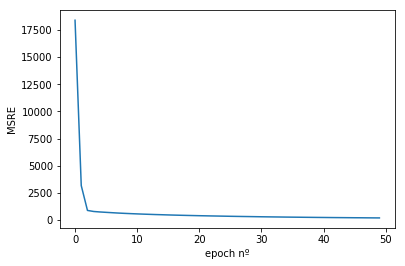

In [17]:
plt.plot(something.history['loss']);
plt.ylabel('MSRE');
plt.xlabel('epoch nº');
plt.show()

In [18]:
MSRE_A = [];

def compute_A(X,y,a,b):
    
    for i in range(0,a):

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, shuffle=True)
        model = regression_model()
        something = model.fit(X_train, y_train, epochs=b, verbose=2)
        metrics = model.evaluate(X_test, y_test, verbose = 1)
        MSRE_A.append(metrics)

    return MSRE_A

In [19]:
MSRE_A = compute_A(X,y,a,b)

Epoch 1/50
 - 1s - loss: 82460.3105
Epoch 2/50
 - 0s - loss: 15870.3523
Epoch 3/50
 - 0s - loss: 3747.4076
Epoch 4/50
 - 0s - loss: 3183.8018
Epoch 5/50
 - 0s - loss: 2847.6876
Epoch 6/50
 - 0s - loss: 2572.1499
Epoch 7/50
 - 0s - loss: 2330.2809
Epoch 8/50
 - 0s - loss: 2111.3800
Epoch 9/50
 - 0s - loss: 1912.3541
Epoch 10/50
 - 0s - loss: 1742.7051
Epoch 11/50
 - 0s - loss: 1577.9330
Epoch 12/50
 - 0s - loss: 1432.2109
Epoch 13/50
 - 0s - loss: 1305.2802
Epoch 14/50
 - 0s - loss: 1187.8949
Epoch 15/50
 - 0s - loss: 1083.4895
Epoch 16/50
 - 0s - loss: 982.5616
Epoch 17/50
 - 0s - loss: 899.0360
Epoch 18/50
 - 0s - loss: 819.7933
Epoch 19/50
 - 0s - loss: 746.0398
Epoch 20/50
 - 0s - loss: 684.5847
Epoch 21/50
 - 0s - loss: 629.3620
Epoch 22/50
 - 0s - loss: 577.2399
Epoch 23/50
 - 0s - loss: 533.7127
Epoch 24/50
 - 0s - loss: 493.7547
Epoch 25/50
 - 0s - loss: 455.5640
Epoch 26/50
 - 0s - loss: 423.7035
Epoch 27/50
 - 0s - loss: 393.7033
Epoch 28/50
 - 0s - loss: 366.4032
Epoch 29/50


 - 0s - loss: 139.5490
Epoch 26/50
 - 0s - loss: 133.7428
Epoch 27/50
 - 0s - loss: 129.6121
Epoch 28/50
 - 0s - loss: 126.8805
Epoch 29/50
 - 0s - loss: 125.1280
Epoch 30/50
 - 0s - loss: 122.8312
Epoch 31/50
 - 0s - loss: 121.5091
Epoch 32/50
 - 0s - loss: 121.3352
Epoch 33/50
 - 0s - loss: 120.0114
Epoch 34/50
 - 0s - loss: 117.4317
Epoch 35/50
 - 0s - loss: 118.2987
Epoch 36/50
 - 0s - loss: 116.8035
Epoch 37/50
 - 0s - loss: 115.3679
Epoch 38/50
 - 0s - loss: 114.4699
Epoch 39/50
 - 0s - loss: 114.3609
Epoch 40/50
 - 0s - loss: 113.8730
Epoch 41/50
 - 0s - loss: 113.2355
Epoch 42/50
 - 0s - loss: 114.2299
Epoch 43/50
 - 0s - loss: 114.3725
Epoch 44/50
 - 0s - loss: 112.9892
Epoch 45/50
 - 0s - loss: 112.8362
Epoch 46/50
 - 0s - loss: 114.4194
Epoch 47/50
 - 0s - loss: 111.3387
Epoch 48/50
 - 0s - loss: 110.7774
Epoch 49/50
 - 0s - loss: 112.8743
Epoch 50/50
 - 0s - loss: 112.7861
309/309 [==============================] - 0s 683us/sample - loss: 103.2454
Epoch 1/50
 - 1s - loss: 1

Epoch 50/50
 - 0s - loss: 836.9674
309/309 [==============================] - 0s 949us/sample - loss: 820.5787
Epoch 1/50
 - 1s - loss: 12725.2733
Epoch 2/50
 - 0s - loss: 9570.9662
Epoch 3/50
 - 0s - loss: 7117.5263
Epoch 4/50
 - 0s - loss: 5234.2846
Epoch 5/50
 - 0s - loss: 3768.3916
Epoch 6/50
 - 0s - loss: 2710.3858
Epoch 7/50
 - 0s - loss: 2044.3648
Epoch 8/50
 - 0s - loss: 1644.5329
Epoch 9/50
 - 0s - loss: 1407.4799
Epoch 10/50
 - 0s - loss: 1225.3051
Epoch 11/50
 - 0s - loss: 1076.2375
Epoch 12/50
 - 0s - loss: 969.8964
Epoch 13/50
 - 0s - loss: 861.4537
Epoch 14/50
 - 0s - loss: 789.1472
Epoch 15/50
 - 0s - loss: 715.3617
Epoch 16/50
 - 0s - loss: 657.6862
Epoch 17/50
 - 0s - loss: 609.0511
Epoch 18/50
 - 0s - loss: 557.3598
Epoch 19/50
 - 0s - loss: 516.7055
Epoch 20/50
 - 0s - loss: 474.4708
Epoch 21/50
 - 0s - loss: 437.5011
Epoch 22/50
 - 0s - loss: 407.4949
Epoch 23/50
 - 0s - loss: 383.1155
Epoch 24/50
 - 0s - loss: 351.4567
Epoch 25/50
 - 0s - loss: 331.9213
Epoch 26/50

Epoch 23/50
 - 0s - loss: 697.9391
Epoch 24/50
 - 0s - loss: 682.1595
Epoch 25/50
 - 0s - loss: 665.9222
Epoch 26/50
 - 0s - loss: 650.5237
Epoch 27/50
 - 0s - loss: 638.5492
Epoch 28/50
 - 0s - loss: 626.2776
Epoch 29/50
 - 0s - loss: 614.0903
Epoch 30/50
 - 0s - loss: 602.5595
Epoch 31/50
 - 0s - loss: 590.7495
Epoch 32/50
 - 0s - loss: 580.4590
Epoch 33/50
 - 0s - loss: 570.7612
Epoch 34/50
 - 0s - loss: 560.3040
Epoch 35/50
 - 0s - loss: 551.4425
Epoch 36/50
 - 0s - loss: 541.4346
Epoch 37/50
 - 0s - loss: 531.9322
Epoch 38/50
 - 0s - loss: 521.1688
Epoch 39/50
 - 0s - loss: 511.6367
Epoch 40/50
 - 0s - loss: 503.3277
Epoch 41/50
 - 0s - loss: 495.8853
Epoch 42/50
 - 0s - loss: 487.6549
Epoch 43/50
 - 0s - loss: 479.0701
Epoch 44/50
 - 0s - loss: 471.4322
Epoch 45/50
 - 0s - loss: 464.0612
Epoch 46/50
 - 0s - loss: 452.1904
Epoch 47/50
 - 0s - loss: 437.0728
Epoch 48/50
 - 0s - loss: 419.2634
Epoch 49/50
 - 0s - loss: 402.0143
Epoch 50/50
 - 0s - loss: 386.1659
309/309 [===========

Epoch 46/50
 - 0s - loss: 335.5212
Epoch 47/50
 - 0s - loss: 322.7248
Epoch 48/50
 - 0s - loss: 309.9438
Epoch 49/50
 - 0s - loss: 298.3718
Epoch 50/50
 - 0s - loss: 286.9339
309/309 [==============================] - 0s 2ms/sample - loss: 268.9599
Epoch 1/50
 - 1s - loss: 191765.3056
Epoch 2/50
 - 0s - loss: 88669.6145
Epoch 3/50
 - 0s - loss: 35054.3987
Epoch 4/50
 - 0s - loss: 12480.5568
Epoch 5/50
 - 0s - loss: 5251.4184
Epoch 6/50
 - 0s - loss: 3537.3406
Epoch 7/50
 - 0s - loss: 3141.3252
Epoch 8/50
 - 0s - loss: 2940.2003
Epoch 9/50
 - 0s - loss: 2754.9265
Epoch 10/50
 - 0s - loss: 2569.7613
Epoch 11/50
 - 0s - loss: 2395.1382
Epoch 12/50
 - 0s - loss: 2228.2044
Epoch 13/50
 - 0s - loss: 2071.4823
Epoch 14/50
 - 0s - loss: 1922.0827
Epoch 15/50
 - 0s - loss: 1783.0115
Epoch 16/50
 - 0s - loss: 1647.1486
Epoch 17/50
 - 0s - loss: 1521.0649
Epoch 18/50
 - 0s - loss: 1403.7554
Epoch 19/50
 - 0s - loss: 1294.8348
Epoch 20/50
 - 0s - loss: 1195.2580
Epoch 21/50
 - 0s - loss: 1101.0840

Epoch 18/50
 - 0s - loss: 1271.2673
Epoch 19/50
 - 0s - loss: 1195.6154
Epoch 20/50
 - 0s - loss: 1122.0624
Epoch 21/50
 - 0s - loss: 1057.3476
Epoch 22/50
 - 0s - loss: 995.0497
Epoch 23/50
 - 0s - loss: 938.4777
Epoch 24/50
 - 0s - loss: 887.1842
Epoch 25/50
 - 0s - loss: 842.4098
Epoch 26/50
 - 0s - loss: 796.6066
Epoch 27/50
 - 0s - loss: 756.5139
Epoch 28/50
 - 0s - loss: 714.0196
Epoch 29/50
 - 0s - loss: 678.1497
Epoch 30/50
 - 0s - loss: 642.8835
Epoch 31/50
 - 0s - loss: 608.5786
Epoch 32/50
 - 0s - loss: 579.8452
Epoch 33/50
 - 0s - loss: 554.6629
Epoch 34/50
 - 0s - loss: 525.4813
Epoch 35/50
 - 0s - loss: 501.2302
Epoch 36/50
 - 0s - loss: 479.5498
Epoch 37/50
 - 0s - loss: 459.3066
Epoch 38/50
 - 0s - loss: 442.8368
Epoch 39/50
 - 0s - loss: 421.5694
Epoch 40/50
 - 0s - loss: 405.5799
Epoch 41/50
 - 0s - loss: 391.5404
Epoch 42/50
 - 0s - loss: 380.3990
Epoch 43/50
 - 0s - loss: 364.1256
Epoch 44/50
 - 0s - loss: 352.3037
Epoch 45/50
 - 0s - loss: 340.6122
Epoch 46/50
 - 0

 - 0s - loss: 88.0568
Epoch 45/50
 - 0s - loss: 86.0435
Epoch 46/50
 - 0s - loss: 90.8647
Epoch 47/50
 - 0s - loss: 85.5261
Epoch 48/50
 - 0s - loss: 86.1330
Epoch 49/50
 - 0s - loss: 83.6965
Epoch 50/50
 - 0s - loss: 87.3055
309/309 [==============================] - 1s 2ms/sample - loss: 87.0337
Epoch 1/50
 - 2s - loss: 169244.6644
Epoch 2/50
 - 0s - loss: 89202.0076
Epoch 3/50
 - 0s - loss: 46530.0394
Epoch 4/50
 - 0s - loss: 25389.6632
Epoch 5/50
 - 0s - loss: 13352.7606
Epoch 6/50
 - 0s - loss: 6487.5461
Epoch 7/50
 - 0s - loss: 2938.6681
Epoch 8/50
 - 0s - loss: 1295.3870
Epoch 9/50
 - 0s - loss: 641.7077
Epoch 10/50
 - 0s - loss: 411.4499
Epoch 11/50
 - 0s - loss: 341.3401
Epoch 12/50
 - 0s - loss: 320.9716
Epoch 13/50
 - 0s - loss: 314.0698
Epoch 14/50
 - 0s - loss: 310.1740
Epoch 15/50
 - 0s - loss: 306.1689
Epoch 16/50
 - 0s - loss: 302.6935
Epoch 17/50
 - 0s - loss: 299.2350
Epoch 18/50
 - 0s - loss: 295.6851
Epoch 19/50
 - 0s - loss: 292.5900
Epoch 20/50
 - 0s - loss: 289.0

 - 0s - loss: 3002.8285
Epoch 17/50
 - 0s - loss: 2836.8962
Epoch 18/50
 - 0s - loss: 2673.4751
Epoch 19/50
 - 0s - loss: 2531.1330
Epoch 20/50
 - 0s - loss: 2397.8757
Epoch 21/50
 - 0s - loss: 2280.0985
Epoch 22/50
 - 0s - loss: 2171.6004
Epoch 23/50
 - 0s - loss: 2071.1859
Epoch 24/50
 - 0s - loss: 1981.7774
Epoch 25/50
 - 0s - loss: 1901.3299
Epoch 26/50
 - 0s - loss: 1826.0023
Epoch 27/50
 - 0s - loss: 1754.2955
Epoch 28/50
 - 0s - loss: 1686.4803
Epoch 29/50
 - 0s - loss: 1628.0331
Epoch 30/50
 - 0s - loss: 1573.9971
Epoch 31/50
 - 0s - loss: 1517.3132
Epoch 32/50
 - 0s - loss: 1466.9441
Epoch 33/50
 - 0s - loss: 1420.9534
Epoch 34/50
 - 0s - loss: 1377.7271
Epoch 35/50
 - 0s - loss: 1338.2847
Epoch 36/50
 - 0s - loss: 1298.1544
Epoch 37/50
 - 0s - loss: 1262.1098
Epoch 38/50
 - 0s - loss: 1226.9809
Epoch 39/50
 - 0s - loss: 1193.0984
Epoch 40/50
 - 0s - loss: 1160.9136
Epoch 41/50
 - 0s - loss: 1130.1335
Epoch 42/50
 - 0s - loss: 1102.3478
Epoch 43/50
 - 0s - loss: 1072.8374
Epoc

Epoch 39/50
 - 0s - loss: 118.3957
Epoch 40/50
 - 0s - loss: 116.9502
Epoch 41/50
 - 0s - loss: 117.7705
Epoch 42/50
 - 0s - loss: 115.9904
Epoch 43/50
 - 0s - loss: 115.4475
Epoch 44/50
 - 0s - loss: 114.6856
Epoch 45/50
 - 0s - loss: 114.4663
Epoch 46/50
 - 0s - loss: 114.2538
Epoch 47/50
 - 0s - loss: 116.0850
Epoch 48/50
 - 0s - loss: 114.5587
Epoch 49/50
 - 0s - loss: 114.9867
Epoch 50/50
 - 0s - loss: 118.0026
309/309 [==============================] - 1s 3ms/sample - loss: 106.6471
Epoch 1/50
 - 3s - loss: 113710.1475
Epoch 2/50
 - 0s - loss: 50062.0118
Epoch 3/50
 - 0s - loss: 17412.3010
Epoch 4/50
 - 0s - loss: 4205.1905
Epoch 5/50
 - 0s - loss: 1230.7293
Epoch 6/50
 - 0s - loss: 1078.3156
Epoch 7/50
 - 0s - loss: 965.4964
Epoch 8/50
 - 0s - loss: 824.9314
Epoch 9/50
 - 0s - loss: 685.6842
Epoch 10/50
 - 0s - loss: 588.0112
Epoch 11/50
 - 0s - loss: 535.9582
Epoch 12/50
 - 0s - loss: 485.3584
Epoch 13/50
 - 0s - loss: 436.8197
Epoch 14/50
 - 0s - loss: 396.1885
Epoch 15/50
 - 

Epoch 10/50
 - 0s - loss: 623.8475
Epoch 11/50
 - 0s - loss: 503.2155
Epoch 12/50
 - 0s - loss: 409.2547
Epoch 13/50
 - 0s - loss: 339.8517
Epoch 14/50
 - 0s - loss: 291.7573
Epoch 15/50
 - 0s - loss: 256.0851
Epoch 16/50
 - 0s - loss: 230.1042
Epoch 17/50
 - 0s - loss: 210.8920
Epoch 18/50
 - 0s - loss: 195.3505
Epoch 19/50
 - 0s - loss: 186.7236
Epoch 20/50
 - 0s - loss: 175.4505
Epoch 21/50
 - 0s - loss: 167.9203
Epoch 22/50
 - 0s - loss: 162.1549
Epoch 23/50
 - 0s - loss: 156.2192
Epoch 24/50
 - 0s - loss: 152.1295
Epoch 25/50
 - 0s - loss: 150.0913
Epoch 26/50
 - 0s - loss: 143.6190
Epoch 27/50
 - 0s - loss: 140.5443
Epoch 28/50
 - 0s - loss: 139.2589
Epoch 29/50
 - 0s - loss: 136.0103
Epoch 30/50
 - 0s - loss: 134.0359
Epoch 31/50
 - 0s - loss: 131.3586
Epoch 32/50
 - 0s - loss: 129.9286
Epoch 33/50
 - 0s - loss: 128.2692
Epoch 34/50
 - 0s - loss: 126.7639
Epoch 35/50
 - 0s - loss: 125.7726
Epoch 36/50
 - 0s - loss: 127.6241
Epoch 37/50
 - 0s - loss: 123.7902
Epoch 38/50
 - 0s - 

Epoch 36/50
 - 0s - loss: 617.7753
Epoch 37/50
 - 0s - loss: 598.2415
Epoch 38/50
 - 0s - loss: 578.8510
Epoch 39/50
 - 0s - loss: 561.2839
Epoch 40/50
 - 0s - loss: 542.3827
Epoch 41/50
 - 0s - loss: 526.1159
Epoch 42/50
 - 0s - loss: 510.6060
Epoch 43/50
 - 0s - loss: 495.1737
Epoch 44/50
 - 0s - loss: 478.8677
Epoch 45/50
 - 0s - loss: 464.9379
Epoch 46/50
 - 0s - loss: 451.1513
Epoch 47/50
 - 0s - loss: 437.2367
Epoch 48/50
 - 0s - loss: 424.0854
Epoch 49/50
 - 0s - loss: 411.6958
Epoch 50/50
 - 0s - loss: 399.9604
309/309 [==============================] - 1s 5ms/sample - loss: 338.6371
Epoch 1/50
 - 4s - loss: 18579.7259
Epoch 2/50
 - 0s - loss: 5559.4017
Epoch 3/50
 - 0s - loss: 4869.6873
Epoch 4/50
 - 0s - loss: 4171.9087
Epoch 5/50
 - 0s - loss: 3617.6675
Epoch 6/50
 - 0s - loss: 3127.4789
Epoch 7/50
 - 0s - loss: 2668.8845
Epoch 8/50
 - 0s - loss: 2297.2431
Epoch 9/50
 - 0s - loss: 1952.0108
Epoch 10/50
 - 0s - loss: 1681.3872
Epoch 11/50
 - 0s - loss: 1458.6002
Epoch 12/50
 

 - 0s - loss: 496.3448
Epoch 8/50
 - 0s - loss: 441.2347
Epoch 9/50
 - 0s - loss: 394.8385
Epoch 10/50
 - 0s - loss: 362.2973
Epoch 11/50
 - 0s - loss: 336.0637
Epoch 12/50
 - 0s - loss: 314.1714
Epoch 13/50
 - 0s - loss: 295.1898
Epoch 14/50
 - 0s - loss: 280.8240
Epoch 15/50
 - 0s - loss: 268.2117
Epoch 16/50
 - 0s - loss: 255.1715
Epoch 17/50
 - 0s - loss: 243.2402
Epoch 18/50
 - 0s - loss: 233.9979
Epoch 19/50
 - 0s - loss: 227.5395
Epoch 20/50
 - 0s - loss: 218.3507
Epoch 21/50
 - 0s - loss: 210.5570
Epoch 22/50
 - 0s - loss: 204.3288
Epoch 23/50
 - 0s - loss: 197.9685
Epoch 24/50
 - 0s - loss: 192.3004
Epoch 25/50
 - 0s - loss: 188.2628
Epoch 26/50
 - 0s - loss: 182.9640
Epoch 27/50
 - 0s - loss: 177.9678
Epoch 28/50
 - 0s - loss: 175.4406
Epoch 29/50
 - 0s - loss: 169.4353
Epoch 30/50
 - 0s - loss: 166.3605
Epoch 31/50
 - 0s - loss: 162.5488
Epoch 32/50
 - 0s - loss: 158.6701
Epoch 33/50
 - 0s - loss: 154.4118
Epoch 34/50
 - 0s - loss: 156.2201
Epoch 35/50
 - 0s - loss: 148.9109

In [20]:
print('mean MSRE of running model 50 times with random X_train, y_train, X_test, y_test => mean MSRE', np.mean(MSRE_A))
print('std MSRE of running model 50 times with random X_train, y_train, X_test, y_test => std MSRE', np.std(MSRE_A))

mean MSRE of running model 50 times with random X_train, y_train, X_test, y_test => mean MSRE 376.55077460872315
std MSRE of running model 50 times with random X_train, y_train, X_test, y_test => std MSRE 462.0616520116184


In [21]:
mean_MSRE_A = np.round(np.mean(MSRE_A),decimals = 5)
std_MSRE_A = np.round(np.std(MSRE_A),decimals = 5)

### B. Normalize the data

Repeat Part A but use a normalized version of the data. Recall that one way to normalize the data is by subtracting the mean from the individual predictors and dividing by the standard deviation.

How does the mean of the mean squared errors compare to that from Step A?

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
valuesForNorm = df_concrete.values

In [24]:
valuesNormed = StandardScaler().fit(valuesForNorm).transform(valuesForNorm)

In [25]:
X_norm = valuesNormed[:,0:valuesNormed.shape[1]-1]
y_norm = valuesNormed[:,valuesNormed.shape[1]-1]

In [26]:
MSRE_B = [];

def compute_B(X,y,a,b):
    
    for i in range(0,a):

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, shuffle=True)
        model = regression_model()
        something = model.fit(X_train, y_train, epochs=b, verbose=2)
        metrics = model.evaluate(X_test, y_test, verbose = 1)
        MSRE_B.append(metrics)

    return MSRE_B

In [27]:
MSRE_B = compute_B(X_norm,y_norm,a,b)

Epoch 1/50
 - 4s - loss: 2.7967
Epoch 2/50
 - 0s - loss: 2.2960
Epoch 3/50
 - 0s - loss: 1.9153
Epoch 4/50
 - 0s - loss: 1.6219
Epoch 5/50
 - 0s - loss: 1.3902
Epoch 6/50
 - 0s - loss: 1.2070
Epoch 7/50
 - 0s - loss: 1.0536
Epoch 8/50
 - 0s - loss: 0.9338
Epoch 9/50
 - 0s - loss: 0.8293
Epoch 10/50
 - 0s - loss: 0.7470
Epoch 11/50
 - 0s - loss: 0.6789
Epoch 12/50
 - 0s - loss: 0.6242
Epoch 13/50
 - 0s - loss: 0.5773
Epoch 14/50
 - 0s - loss: 0.5399
Epoch 15/50
 - 0s - loss: 0.5101
Epoch 16/50
 - 0s - loss: 0.4844
Epoch 17/50
 - 0s - loss: 0.4641
Epoch 18/50
 - 0s - loss: 0.4453
Epoch 19/50
 - 0s - loss: 0.4291
Epoch 20/50
 - 0s - loss: 0.4145
Epoch 21/50
 - 0s - loss: 0.4006
Epoch 22/50
 - 0s - loss: 0.3875
Epoch 23/50
 - 0s - loss: 0.3760
Epoch 24/50
 - 0s - loss: 0.3650
Epoch 25/50
 - 0s - loss: 0.3543
Epoch 26/50
 - 0s - loss: 0.3442
Epoch 27/50
 - 0s - loss: 0.3338
Epoch 28/50
 - 0s - loss: 0.3253
Epoch 29/50
 - 0s - loss: 0.3157
Epoch 30/50
 - 0s - loss: 0.3073
Epoch 31/50
 - 0s -

Epoch 42/50
 - 0s - loss: 0.1999
Epoch 43/50
 - 0s - loss: 0.1975
Epoch 44/50
 - 0s - loss: 0.1950
Epoch 45/50
 - 0s - loss: 0.1926
Epoch 46/50
 - 0s - loss: 0.1912
Epoch 47/50
 - 0s - loss: 0.1883
Epoch 48/50
 - 0s - loss: 0.1863
Epoch 49/50
 - 0s - loss: 0.1844
Epoch 50/50
 - 0s - loss: 0.1822
309/309 [==============================] - 2s 6ms/sample - loss: 0.1975
Epoch 1/50
 - 5s - loss: 1.4447
Epoch 2/50
 - 0s - loss: 1.2259
Epoch 3/50
 - 0s - loss: 1.0556
Epoch 4/50
 - 0s - loss: 0.9257
Epoch 5/50
 - 0s - loss: 0.8145
Epoch 6/50
 - 0s - loss: 0.7314
Epoch 7/50
 - 0s - loss: 0.6594
Epoch 8/50
 - 0s - loss: 0.6032
Epoch 9/50
 - 0s - loss: 0.5568
Epoch 10/50
 - 0s - loss: 0.5201
Epoch 11/50
 - 0s - loss: 0.4890
Epoch 12/50
 - 0s - loss: 0.4652
Epoch 13/50
 - 0s - loss: 0.4447
Epoch 14/50
 - 0s - loss: 0.4278
Epoch 15/50
 - 0s - loss: 0.4140
Epoch 16/50
 - 0s - loss: 0.4029
Epoch 17/50
 - 0s - loss: 0.3929
Epoch 18/50
 - 0s - loss: 0.3840
Epoch 19/50
 - 0s - loss: 0.3755
Epoch 20/50
 

Epoch 31/50
 - 0s - loss: 0.3257
Epoch 32/50
 - 0s - loss: 0.3174
Epoch 33/50
 - 0s - loss: 0.3107
Epoch 34/50
 - 0s - loss: 0.3038
Epoch 35/50
 - 0s - loss: 0.2970
Epoch 36/50
 - 0s - loss: 0.2909
Epoch 37/50
 - 0s - loss: 0.2852
Epoch 38/50
 - 0s - loss: 0.2787
Epoch 39/50
 - 0s - loss: 0.2736
Epoch 40/50
 - 0s - loss: 0.2675
Epoch 41/50
 - 0s - loss: 0.2618
Epoch 42/50
 - 0s - loss: 0.2570
Epoch 43/50
 - 0s - loss: 0.2512
Epoch 44/50
 - 0s - loss: 0.2466
Epoch 45/50
 - 0s - loss: 0.2413
Epoch 46/50
 - 0s - loss: 0.2361
Epoch 47/50
 - 0s - loss: 0.2316
Epoch 48/50
 - 0s - loss: 0.2262
Epoch 49/50
 - 0s - loss: 0.2226
Epoch 50/50
 - 0s - loss: 0.2177
309/309 [==============================] - 2s 7ms/sample - loss: 0.2569
Epoch 1/50
 - 6s - loss: 1.5350
Epoch 2/50
 - 0s - loss: 1.2967
Epoch 3/50
 - 0s - loss: 1.1126
Epoch 4/50
 - 0s - loss: 0.9757
Epoch 5/50
 - 0s - loss: 0.8685
Epoch 6/50
 - 0s - loss: 0.7812
Epoch 7/50
 - 0s - loss: 0.7134
Epoch 8/50
 - 0s - loss: 0.6587
Epoch 9/50
 

Epoch 20/50
 - 0s - loss: 0.5272
Epoch 21/50
 - 0s - loss: 0.5171
Epoch 22/50
 - 0s - loss: 0.5072
Epoch 23/50
 - 0s - loss: 0.4976
Epoch 24/50
 - 0s - loss: 0.4883
Epoch 25/50
 - 0s - loss: 0.4798
Epoch 26/50
 - 0s - loss: 0.4715
Epoch 27/50
 - 0s - loss: 0.4638
Epoch 28/50
 - 0s - loss: 0.4555
Epoch 29/50
 - 0s - loss: 0.4478
Epoch 30/50
 - 0s - loss: 0.4404
Epoch 31/50
 - 0s - loss: 0.4329
Epoch 32/50
 - 0s - loss: 0.4255
Epoch 33/50
 - 0s - loss: 0.4185
Epoch 34/50
 - 0s - loss: 0.4120
Epoch 35/50
 - 0s - loss: 0.4041
Epoch 36/50
 - 0s - loss: 0.3975
Epoch 37/50
 - 0s - loss: 0.3908
Epoch 38/50
 - 0s - loss: 0.3845
Epoch 39/50
 - 0s - loss: 0.3778
Epoch 40/50
 - 0s - loss: 0.3721
Epoch 41/50
 - 0s - loss: 0.3657
Epoch 42/50
 - 0s - loss: 0.3600
Epoch 43/50
 - 0s - loss: 0.3532
Epoch 44/50
 - 0s - loss: 0.3476
Epoch 45/50
 - 0s - loss: 0.3416
Epoch 46/50
 - 0s - loss: 0.3361
Epoch 47/50
 - 0s - loss: 0.3315
Epoch 48/50
 - 0s - loss: 0.3261
Epoch 49/50
 - 0s - loss: 0.3217
Epoch 50/5

Epoch 9/50
 - 0s - loss: 0.5408
Epoch 10/50
 - 0s - loss: 0.5181
Epoch 11/50
 - 0s - loss: 0.4997
Epoch 12/50
 - 0s - loss: 0.4825
Epoch 13/50
 - 0s - loss: 0.4686
Epoch 14/50
 - 0s - loss: 0.4560
Epoch 15/50
 - 0s - loss: 0.4444
Epoch 16/50
 - 0s - loss: 0.4345
Epoch 17/50
 - 0s - loss: 0.4252
Epoch 18/50
 - 0s - loss: 0.4154
Epoch 19/50
 - 0s - loss: 0.4063
Epoch 20/50
 - 0s - loss: 0.3982
Epoch 21/50
 - 0s - loss: 0.3910
Epoch 22/50
 - 0s - loss: 0.3837
Epoch 23/50
 - 0s - loss: 0.3751
Epoch 24/50
 - 0s - loss: 0.3688
Epoch 25/50
 - 0s - loss: 0.3621
Epoch 26/50
 - 0s - loss: 0.3568
Epoch 27/50
 - 0s - loss: 0.3506
Epoch 28/50
 - 0s - loss: 0.3449
Epoch 29/50
 - 0s - loss: 0.3391
Epoch 30/50
 - 0s - loss: 0.3338
Epoch 31/50
 - 0s - loss: 0.3281
Epoch 32/50
 - 0s - loss: 0.3226
Epoch 33/50
 - 0s - loss: 0.3180
Epoch 34/50
 - 0s - loss: 0.3122
Epoch 35/50
 - 0s - loss: 0.3077
Epoch 36/50
 - 0s - loss: 0.3024
Epoch 37/50
 - 0s - loss: 0.2976
Epoch 38/50
 - 0s - loss: 0.2923
Epoch 39/50

Epoch 50/50
 - 0s - loss: 0.1965
309/309 [==============================] - 3s 10ms/sample - loss: 0.1816
Epoch 1/50
 - 7s - loss: 1.3309
Epoch 2/50
 - 0s - loss: 1.1548
Epoch 3/50
 - 0s - loss: 1.0221
Epoch 4/50
 - 0s - loss: 0.9103
Epoch 5/50
 - 0s - loss: 0.8243
Epoch 6/50
 - 0s - loss: 0.7509
Epoch 7/50
 - 0s - loss: 0.6900
Epoch 8/50
 - 0s - loss: 0.6432
Epoch 9/50
 - 0s - loss: 0.6004
Epoch 10/50
 - 0s - loss: 0.5654
Epoch 11/50
 - 0s - loss: 0.5356
Epoch 12/50
 - 0s - loss: 0.5107
Epoch 13/50
 - 0s - loss: 0.4876
Epoch 14/50
 - 0s - loss: 0.4682
Epoch 15/50
 - 0s - loss: 0.4508
Epoch 16/50
 - 0s - loss: 0.4347
Epoch 17/50
 - 0s - loss: 0.4188
Epoch 18/50
 - 0s - loss: 0.4050
Epoch 19/50
 - 0s - loss: 0.3920
Epoch 20/50
 - 0s - loss: 0.3792
Epoch 21/50
 - 0s - loss: 0.3674
Epoch 22/50
 - 0s - loss: 0.3552
Epoch 23/50
 - 0s - loss: 0.3443
Epoch 24/50
 - 0s - loss: 0.3342
Epoch 25/50
 - 0s - loss: 0.3245
Epoch 26/50
 - 0s - loss: 0.3144
Epoch 27/50
 - 0s - loss: 0.3056
Epoch 28/50


Epoch 39/50
 - 0s - loss: 0.2259
Epoch 40/50
 - 0s - loss: 0.2227
Epoch 41/50
 - 0s - loss: 0.2189
Epoch 42/50
 - 0s - loss: 0.2164
Epoch 43/50
 - 0s - loss: 0.2133
Epoch 44/50
 - 0s - loss: 0.2104
Epoch 45/50
 - 0s - loss: 0.2075
Epoch 46/50
 - 0s - loss: 0.2052
Epoch 47/50
 - 0s - loss: 0.2025
Epoch 48/50
 - 0s - loss: 0.2001
Epoch 49/50
 - 0s - loss: 0.1987
Epoch 50/50
 - 0s - loss: 0.1959
309/309 [==============================] - 3s 11ms/sample - loss: 0.2354
Epoch 1/50
 - 8s - loss: 1.4351
Epoch 2/50
 - 0s - loss: 1.1534
Epoch 3/50
 - 0s - loss: 0.9526
Epoch 4/50
 - 0s - loss: 0.8000
Epoch 5/50
 - 0s - loss: 0.6850
Epoch 6/50
 - 0s - loss: 0.5981
Epoch 7/50
 - 0s - loss: 0.5274
Epoch 8/50
 - 0s - loss: 0.4736
Epoch 9/50
 - 0s - loss: 0.4333
Epoch 10/50
 - 0s - loss: 0.4013
Epoch 11/50
 - 0s - loss: 0.3776
Epoch 12/50
 - 0s - loss: 0.3596
Epoch 13/50
 - 0s - loss: 0.3463
Epoch 14/50
 - 0s - loss: 0.3357
Epoch 15/50
 - 0s - loss: 0.3279
Epoch 16/50
 - 0s - loss: 0.3205
Epoch 17/50


Epoch 28/50
 - 0s - loss: 0.2689
Epoch 29/50
 - 0s - loss: 0.2648
Epoch 30/50
 - 0s - loss: 0.2601
Epoch 31/50
 - 0s - loss: 0.2567
Epoch 32/50
 - 0s - loss: 0.2534
Epoch 33/50
 - 0s - loss: 0.2496
Epoch 34/50
 - 0s - loss: 0.2454
Epoch 35/50
 - 0s - loss: 0.2430
Epoch 36/50
 - 0s - loss: 0.2394
Epoch 37/50
 - 0s - loss: 0.2374
Epoch 38/50
 - 0s - loss: 0.2342
Epoch 39/50
 - 0s - loss: 0.2320
Epoch 40/50
 - 0s - loss: 0.2296
Epoch 41/50
 - 0s - loss: 0.2268
Epoch 42/50
 - 0s - loss: 0.2245
Epoch 43/50
 - 0s - loss: 0.2229
Epoch 44/50
 - 0s - loss: 0.2205
Epoch 45/50
 - 0s - loss: 0.2191
Epoch 46/50
 - 0s - loss: 0.2163
Epoch 47/50
 - 0s - loss: 0.2150
Epoch 48/50
 - 0s - loss: 0.2135
Epoch 49/50
 - 0s - loss: 0.2110
Epoch 50/50
 - 0s - loss: 0.2099
309/309 [==============================] - 4s 12ms/sample - loss: 0.2288
Epoch 1/50
 - 9s - loss: 1.8142
Epoch 2/50
 - 0s - loss: 1.5151
Epoch 3/50
 - 0s - loss: 1.2983
Epoch 4/50
 - 0s - loss: 1.1317
Epoch 5/50
 - 0s - loss: 1.0018
Epoch 6/

Epoch 17/50
 - 0s - loss: 0.5123
Epoch 18/50
 - 0s - loss: 0.4988
Epoch 19/50
 - 0s - loss: 0.4884
Epoch 20/50
 - 0s - loss: 0.4788
Epoch 21/50
 - 0s - loss: 0.4712
Epoch 22/50
 - 0s - loss: 0.4630
Epoch 23/50
 - 0s - loss: 0.4557
Epoch 24/50
 - 0s - loss: 0.4479
Epoch 25/50
 - 0s - loss: 0.4414
Epoch 26/50
 - 0s - loss: 0.4338
Epoch 27/50
 - 0s - loss: 0.4263
Epoch 28/50
 - 0s - loss: 0.4190
Epoch 29/50
 - 0s - loss: 0.4123
Epoch 30/50
 - 0s - loss: 0.4053
Epoch 31/50
 - 0s - loss: 0.3991
Epoch 32/50
 - 0s - loss: 0.3923
Epoch 33/50
 - 0s - loss: 0.3853
Epoch 34/50
 - 0s - loss: 0.3788
Epoch 35/50
 - 0s - loss: 0.3735
Epoch 36/50
 - 0s - loss: 0.3668
Epoch 37/50
 - 0s - loss: 0.3600
Epoch 38/50
 - 0s - loss: 0.3533
Epoch 39/50
 - 0s - loss: 0.3471
Epoch 40/50
 - 0s - loss: 0.3407
Epoch 41/50
 - 0s - loss: 0.3344
Epoch 42/50
 - 0s - loss: 0.3286
Epoch 43/50
 - 0s - loss: 0.3220
Epoch 44/50
 - 0s - loss: 0.3160
Epoch 45/50
 - 0s - loss: 0.3101
Epoch 46/50
 - 0s - loss: 0.3044
Epoch 47/5

 - 0s - loss: 0.6161
Epoch 6/50
 - 0s - loss: 0.5702
Epoch 7/50
 - 0s - loss: 0.5349
Epoch 8/50
 - 0s - loss: 0.5069
Epoch 9/50
 - 0s - loss: 0.4831
Epoch 10/50
 - 0s - loss: 0.4639
Epoch 11/50
 - 0s - loss: 0.4467
Epoch 12/50
 - 0s - loss: 0.4341
Epoch 13/50
 - 0s - loss: 0.4191
Epoch 14/50
 - 0s - loss: 0.4064
Epoch 15/50
 - 0s - loss: 0.3947
Epoch 16/50
 - 0s - loss: 0.3829
Epoch 17/50
 - 0s - loss: 0.3706
Epoch 18/50
 - 0s - loss: 0.3591
Epoch 19/50
 - 0s - loss: 0.3475
Epoch 20/50
 - 0s - loss: 0.3379
Epoch 21/50
 - 0s - loss: 0.3282
Epoch 22/50
 - 0s - loss: 0.3190
Epoch 23/50
 - 0s - loss: 0.3111
Epoch 24/50
 - 0s - loss: 0.3025
Epoch 25/50
 - 0s - loss: 0.2949
Epoch 26/50
 - 0s - loss: 0.2881
Epoch 27/50
 - 0s - loss: 0.2815
Epoch 28/50
 - 0s - loss: 0.2759
Epoch 29/50
 - 0s - loss: 0.2700
Epoch 30/50
 - 0s - loss: 0.2639
Epoch 31/50
 - 0s - loss: 0.2599
Epoch 32/50
 - 0s - loss: 0.2538
Epoch 33/50
 - 0s - loss: 0.2497
Epoch 34/50
 - 0s - loss: 0.2449
Epoch 35/50
 - 0s - loss: 

Epoch 46/50
 - 0s - loss: 0.2332
Epoch 47/50
 - 0s - loss: 0.2309
Epoch 48/50
 - 0s - loss: 0.2290
Epoch 49/50
 - 0s - loss: 0.2266
Epoch 50/50
 - 0s - loss: 0.2249
309/309 [==============================] - 5s 15ms/sample - loss: 0.2236
Epoch 1/50
 - 11s - loss: 0.9447
Epoch 2/50
 - 0s - loss: 0.7996
Epoch 3/50
 - 0s - loss: 0.6990
Epoch 4/50
 - 0s - loss: 0.6271
Epoch 5/50
 - 0s - loss: 0.5696
Epoch 6/50
 - 0s - loss: 0.5272
Epoch 7/50
 - 0s - loss: 0.4912
Epoch 8/50
 - 0s - loss: 0.4638
Epoch 9/50
 - 0s - loss: 0.4406
Epoch 10/50
 - 0s - loss: 0.4205
Epoch 11/50
 - 0s - loss: 0.4021
Epoch 12/50
 - 0s - loss: 0.3867
Epoch 13/50
 - 0s - loss: 0.3723
Epoch 14/50
 - 0s - loss: 0.3589
Epoch 15/50
 - 0s - loss: 0.3472
Epoch 16/50
 - 0s - loss: 0.3365
Epoch 17/50
 - 0s - loss: 0.3269
Epoch 18/50
 - 0s - loss: 0.3186
Epoch 19/50
 - 0s - loss: 0.3108
Epoch 20/50
 - 0s - loss: 0.3043
Epoch 21/50
 - 0s - loss: 0.2967
Epoch 22/50
 - 0s - loss: 0.2908
Epoch 23/50
 - 0s - loss: 0.2856
Epoch 24/50

In [28]:
print('mean MSRE of running model 50 times with random X_train, y_train, X_test, y_test => mean MSRE', np.mean(MSRE_B))
print('std MSRE of running model 50 times with random X_train, y_train, X_test, y_test => std MSRE', np.std(MSRE_B))

mean MSRE of running model 50 times with random X_train, y_train, X_test, y_test => mean MSRE 0.24379377175110442
std MSRE of running model 50 times with random X_train, y_train, X_test, y_test => std MSRE 0.04598890762031116


In [29]:
mean_MSRE_B = np.round(np.mean(MSRE_B), decimals = 5)
std_MSRE_B = np.round(np.std(MSRE_B), decimals = 5)

### C. Increase the number of epochs
Repeat Part B but use 100 epochs this time for training.

How does the mean of the mean squared errors compare to that from Step B?

In [30]:
MSRE_C = [];

def compute_C(X,y,a,b):
    
    for i in range(0,a):

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, shuffle=True)
        model = regression_model()
        something = model.fit(X_train, y_train, epochs=b*2, verbose=2)
        metrics = model.evaluate(X_test, y_test, verbose = 1)
        MSRE_C.append(metrics)

    return MSRE_C

In [31]:
MSRE_C = compute_C(X_norm,y_norm,a,b)

Epoch 1/100
 - 11s - loss: 2.7670
Epoch 2/100
 - 0s - loss: 2.2877
Epoch 3/100
 - 0s - loss: 1.9148
Epoch 4/100
 - 0s - loss: 1.6100
Epoch 5/100
 - 0s - loss: 1.3538
Epoch 6/100
 - 0s - loss: 1.1547
Epoch 7/100
 - 0s - loss: 0.9863
Epoch 8/100
 - 0s - loss: 0.8565
Epoch 9/100
 - 0s - loss: 0.7507
Epoch 10/100
 - 0s - loss: 0.6670
Epoch 11/100
 - 0s - loss: 0.6050
Epoch 12/100
 - 0s - loss: 0.5547
Epoch 13/100
 - 0s - loss: 0.5158
Epoch 14/100
 - 0s - loss: 0.4841
Epoch 15/100
 - 0s - loss: 0.4587
Epoch 16/100
 - 0s - loss: 0.4375
Epoch 17/100
 - 0s - loss: 0.4189
Epoch 18/100
 - 0s - loss: 0.4038
Epoch 19/100
 - 0s - loss: 0.3888
Epoch 20/100
 - 0s - loss: 0.3756
Epoch 21/100
 - 0s - loss: 0.3635
Epoch 22/100
 - 0s - loss: 0.3522
Epoch 23/100
 - 0s - loss: 0.3414
Epoch 24/100
 - 0s - loss: 0.3312
Epoch 25/100
 - 0s - loss: 0.3218
Epoch 26/100
 - 0s - loss: 0.3129
Epoch 27/100
 - 0s - loss: 0.3043
Epoch 28/100
 - 0s - loss: 0.2965
Epoch 29/100
 - 0s - loss: 0.2897
Epoch 30/100
 - 0s - l

 - 0s - loss: 0.2224
Epoch 39/100
 - 0s - loss: 0.2196
Epoch 40/100
 - 0s - loss: 0.2156
Epoch 41/100
 - 0s - loss: 0.2119
Epoch 42/100
 - 0s - loss: 0.2084
Epoch 43/100
 - 0s - loss: 0.2050
Epoch 44/100
 - 0s - loss: 0.2014
Epoch 45/100
 - 0s - loss: 0.1980
Epoch 46/100
 - 0s - loss: 0.1954
Epoch 47/100
 - 0s - loss: 0.1918
Epoch 48/100
 - 0s - loss: 0.1890
Epoch 49/100
 - 0s - loss: 0.1860
Epoch 50/100
 - 0s - loss: 0.1828
Epoch 51/100
 - 0s - loss: 0.1807
Epoch 52/100
 - 0s - loss: 0.1780
Epoch 53/100
 - 0s - loss: 0.1757
Epoch 54/100
 - 0s - loss: 0.1735
Epoch 55/100
 - 0s - loss: 0.1714
Epoch 56/100
 - 0s - loss: 0.1697
Epoch 57/100
 - 0s - loss: 0.1679
Epoch 58/100
 - 0s - loss: 0.1662
Epoch 59/100
 - 0s - loss: 0.1652
Epoch 60/100
 - 0s - loss: 0.1637
Epoch 61/100
 - 0s - loss: 0.1622
Epoch 62/100
 - 0s - loss: 0.1610
Epoch 63/100
 - 0s - loss: 0.1600
Epoch 64/100
 - 0s - loss: 0.1586
Epoch 65/100
 - 0s - loss: 0.1578
Epoch 66/100
 - 0s - loss: 0.1570
Epoch 67/100
 - 0s - loss: 

Epoch 76/100
 - 0s - loss: 0.1561
Epoch 77/100
 - 0s - loss: 0.1556
Epoch 78/100
 - 0s - loss: 0.1559
Epoch 79/100
 - 0s - loss: 0.1552
Epoch 80/100
 - 0s - loss: 0.1543
Epoch 81/100
 - 0s - loss: 0.1534
Epoch 82/100
 - 0s - loss: 0.1532
Epoch 83/100
 - 0s - loss: 0.1531
Epoch 84/100
 - 0s - loss: 0.1528
Epoch 85/100
 - 0s - loss: 0.1518
Epoch 86/100
 - 0s - loss: 0.1510
Epoch 87/100
 - 0s - loss: 0.1507
Epoch 88/100
 - 0s - loss: 0.1500
Epoch 89/100
 - 0s - loss: 0.1496
Epoch 90/100
 - 0s - loss: 0.1494
Epoch 91/100
 - 0s - loss: 0.1487
Epoch 92/100
 - 0s - loss: 0.1483
Epoch 93/100
 - 0s - loss: 0.1479
Epoch 94/100
 - 0s - loss: 0.1473
Epoch 95/100
 - 0s - loss: 0.1474
Epoch 96/100
 - 0s - loss: 0.1465
Epoch 97/100
 - 0s - loss: 0.1463
Epoch 98/100
 - 0s - loss: 0.1458
Epoch 99/100
 - 0s - loss: 0.1461
Epoch 100/100
 - 0s - loss: 0.1447
309/309 [==============================] - 5s 17ms/sample - loss: 0.1576
Epoch 1/100
 - 12s - loss: 3.6547
Epoch 2/100
 - 0s - loss: 2.8498
Epoch 3/1

 - 0s - loss: 0.7332
Epoch 12/100
 - 0s - loss: 0.6843
Epoch 13/100
 - 0s - loss: 0.6487
Epoch 14/100
 - 0s - loss: 0.6188
Epoch 15/100
 - 0s - loss: 0.5942
Epoch 16/100
 - 0s - loss: 0.5722
Epoch 17/100
 - 0s - loss: 0.5537
Epoch 18/100
 - 0s - loss: 0.5365
Epoch 19/100
 - 0s - loss: 0.5211
Epoch 20/100
 - 0s - loss: 0.5062
Epoch 21/100
 - 0s - loss: 0.4936
Epoch 22/100
 - 0s - loss: 0.4799
Epoch 23/100
 - 0s - loss: 0.4661
Epoch 24/100
 - 0s - loss: 0.4529
Epoch 25/100
 - 0s - loss: 0.4415
Epoch 26/100
 - 0s - loss: 0.4272
Epoch 27/100
 - 0s - loss: 0.4153
Epoch 28/100
 - 0s - loss: 0.4035
Epoch 29/100
 - 0s - loss: 0.3916
Epoch 30/100
 - 0s - loss: 0.3808
Epoch 31/100
 - 0s - loss: 0.3693
Epoch 32/100
 - 0s - loss: 0.3595
Epoch 33/100
 - 0s - loss: 0.3500
Epoch 34/100
 - 0s - loss: 0.3409
Epoch 35/100
 - 0s - loss: 0.3319
Epoch 36/100
 - 0s - loss: 0.3234
Epoch 37/100
 - 0s - loss: 0.3151
Epoch 38/100
 - 0s - loss: 0.3067
Epoch 39/100
 - 0s - loss: 0.2998
Epoch 40/100
 - 0s - loss: 

Epoch 49/100
 - 0s - loss: 0.2024
Epoch 50/100
 - 0s - loss: 0.1988
Epoch 51/100
 - 0s - loss: 0.1959
Epoch 52/100
 - 0s - loss: 0.1923
Epoch 53/100
 - 0s - loss: 0.1906
Epoch 54/100
 - 0s - loss: 0.1873
Epoch 55/100
 - 0s - loss: 0.1852
Epoch 56/100
 - 0s - loss: 0.1828
Epoch 57/100
 - 0s - loss: 0.1801
Epoch 58/100
 - 0s - loss: 0.1788
Epoch 59/100
 - 0s - loss: 0.1765
Epoch 60/100
 - 0s - loss: 0.1744
Epoch 61/100
 - 0s - loss: 0.1727
Epoch 62/100
 - 0s - loss: 0.1705
Epoch 63/100
 - 0s - loss: 0.1685
Epoch 64/100
 - 0s - loss: 0.1672
Epoch 65/100
 - 0s - loss: 0.1666
Epoch 66/100
 - 0s - loss: 0.1641
Epoch 67/100
 - 0s - loss: 0.1626
Epoch 68/100
 - 0s - loss: 0.1615
Epoch 69/100
 - 0s - loss: 0.1603
Epoch 70/100
 - 0s - loss: 0.1593
Epoch 71/100
 - 0s - loss: 0.1581
Epoch 72/100
 - 0s - loss: 0.1571
Epoch 73/100
 - 0s - loss: 0.1561
Epoch 74/100
 - 0s - loss: 0.1550
Epoch 75/100
 - 0s - loss: 0.1537
Epoch 76/100
 - 0s - loss: 0.1532
Epoch 77/100
 - 0s - loss: 0.1520
Epoch 78/100
 

 - 0s - loss: 0.1876
Epoch 87/100
 - 0s - loss: 0.1858
Epoch 88/100
 - 0s - loss: 0.1847
Epoch 89/100
 - 0s - loss: 0.1823
Epoch 90/100
 - 0s - loss: 0.1815
Epoch 91/100
 - 0s - loss: 0.1790
Epoch 92/100
 - 0s - loss: 0.1774
Epoch 93/100
 - 0s - loss: 0.1761
Epoch 94/100
 - 0s - loss: 0.1747
Epoch 95/100
 - 0s - loss: 0.1733
Epoch 96/100
 - 0s - loss: 0.1721
Epoch 97/100
 - 0s - loss: 0.1711
Epoch 98/100
 - 0s - loss: 0.1694
Epoch 99/100
 - 0s - loss: 0.1691
Epoch 100/100
 - 0s - loss: 0.1678
309/309 [==============================] - 6s 19ms/sample - loss: 0.1649
Epoch 1/100
 - 14s - loss: 1.5653
Epoch 2/100
 - 0s - loss: 1.3062
Epoch 3/100
 - 0s - loss: 1.1193
Epoch 4/100
 - 0s - loss: 0.9874
Epoch 5/100
 - 0s - loss: 0.8892
Epoch 6/100
 - 0s - loss: 0.8062
Epoch 7/100
 - 0s - loss: 0.7389
Epoch 8/100
 - 0s - loss: 0.6779
Epoch 9/100
 - 0s - loss: 0.6242
Epoch 10/100
 - 0s - loss: 0.5759
Epoch 11/100
 - 0s - loss: 0.5357
Epoch 12/100
 - 0s - loss: 0.4979
Epoch 13/100
 - 0s - loss: 0.

Epoch 22/100
 - 0s - loss: 0.4105
Epoch 23/100
 - 0s - loss: 0.4019
Epoch 24/100
 - 0s - loss: 0.3934
Epoch 25/100
 - 0s - loss: 0.3832
Epoch 26/100
 - 0s - loss: 0.3743
Epoch 27/100
 - 0s - loss: 0.3646
Epoch 28/100
 - 0s - loss: 0.3554
Epoch 29/100
 - 0s - loss: 0.3454
Epoch 30/100
 - 0s - loss: 0.3372
Epoch 31/100
 - 0s - loss: 0.3284
Epoch 32/100
 - 0s - loss: 0.3203
Epoch 33/100
 - 0s - loss: 0.3126
Epoch 34/100
 - 0s - loss: 0.3043
Epoch 35/100
 - 0s - loss: 0.2981
Epoch 36/100
 - 0s - loss: 0.2914
Epoch 37/100
 - 0s - loss: 0.2857
Epoch 38/100
 - 0s - loss: 0.2801
Epoch 39/100
 - 0s - loss: 0.2748
Epoch 40/100
 - 0s - loss: 0.2699
Epoch 41/100
 - 0s - loss: 0.2655
Epoch 42/100
 - 0s - loss: 0.2613
Epoch 43/100
 - 0s - loss: 0.2577
Epoch 44/100
 - 0s - loss: 0.2536
Epoch 45/100
 - 0s - loss: 0.2503
Epoch 46/100
 - 0s - loss: 0.2458
Epoch 47/100
 - 0s - loss: 0.2423
Epoch 48/100
 - 0s - loss: 0.2396
Epoch 49/100
 - 0s - loss: 0.2355
Epoch 50/100
 - 0s - loss: 0.2325
Epoch 51/100
 

 - 0s - loss: 0.1780
Epoch 60/100
 - 0s - loss: 0.1766
Epoch 61/100
 - 0s - loss: 0.1757
Epoch 62/100
 - 0s - loss: 0.1735
Epoch 63/100
 - 0s - loss: 0.1723
Epoch 64/100
 - 0s - loss: 0.1710
Epoch 65/100
 - 0s - loss: 0.1694
Epoch 66/100
 - 0s - loss: 0.1686
Epoch 67/100
 - 0s - loss: 0.1668
Epoch 68/100
 - 0s - loss: 0.1659
Epoch 69/100
 - 0s - loss: 0.1649
Epoch 70/100
 - 0s - loss: 0.1636
Epoch 71/100
 - 0s - loss: 0.1622
Epoch 72/100
 - 0s - loss: 0.1610
Epoch 73/100
 - 0s - loss: 0.1605
Epoch 74/100
 - 0s - loss: 0.1592
Epoch 75/100
 - 0s - loss: 0.1585
Epoch 76/100
 - 0s - loss: 0.1568
Epoch 77/100
 - 0s - loss: 0.1566
Epoch 78/100
 - 0s - loss: 0.1558
Epoch 79/100
 - 0s - loss: 0.1550
Epoch 80/100
 - 0s - loss: 0.1539
Epoch 81/100
 - 0s - loss: 0.1535
Epoch 82/100
 - 0s - loss: 0.1524
Epoch 83/100
 - 0s - loss: 0.1523
Epoch 84/100
 - 0s - loss: 0.1507
Epoch 85/100
 - 0s - loss: 0.1503
Epoch 86/100
 - 0s - loss: 0.1492
Epoch 87/100
 - 0s - loss: 0.1488
Epoch 88/100
 - 0s - loss: 

Epoch 97/100
 - 0s - loss: 0.1644
Epoch 98/100
 - 0s - loss: 0.1640
Epoch 99/100
 - 0s - loss: 0.1633
Epoch 100/100
 - 0s - loss: 0.1630
309/309 [==============================] - 7s 21ms/sample - loss: 0.1593
Epoch 1/100
 - 15s - loss: 1.4847
Epoch 2/100
 - 0s - loss: 1.2670
Epoch 3/100
 - 0s - loss: 1.1151
Epoch 4/100
 - 0s - loss: 0.9942
Epoch 5/100
 - 0s - loss: 0.9019
Epoch 6/100
 - 0s - loss: 0.8237
Epoch 7/100
 - 0s - loss: 0.7587
Epoch 8/100
 - 0s - loss: 0.7057
Epoch 9/100
 - 0s - loss: 0.6598
Epoch 10/100
 - 0s - loss: 0.6217
Epoch 11/100
 - 0s - loss: 0.5867
Epoch 12/100
 - 0s - loss: 0.5572
Epoch 13/100
 - 0s - loss: 0.5313
Epoch 14/100
 - 0s - loss: 0.5084
Epoch 15/100
 - 0s - loss: 0.4878
Epoch 16/100
 - 0s - loss: 0.4697
Epoch 17/100
 - 0s - loss: 0.4528
Epoch 18/100
 - 0s - loss: 0.4369
Epoch 19/100
 - 0s - loss: 0.4223
Epoch 20/100
 - 0s - loss: 0.4097
Epoch 21/100
 - 0s - loss: 0.3973
Epoch 22/100
 - 0s - loss: 0.3847
Epoch 23/100
 - 0s - loss: 0.3746
Epoch 24/100
 - 

 - 0s - loss: 0.2925
Epoch 33/100
 - 0s - loss: 0.2871
Epoch 34/100
 - 0s - loss: 0.2818
Epoch 35/100
 - 0s - loss: 0.2766
Epoch 36/100
 - 0s - loss: 0.2718
Epoch 37/100
 - 0s - loss: 0.2674
Epoch 38/100
 - 0s - loss: 0.2624
Epoch 39/100
 - 0s - loss: 0.2583
Epoch 40/100
 - 0s - loss: 0.2542
Epoch 41/100
 - 0s - loss: 0.2503
Epoch 42/100
 - 0s - loss: 0.2470
Epoch 43/100
 - 0s - loss: 0.2433
Epoch 44/100
 - 0s - loss: 0.2395
Epoch 45/100
 - 0s - loss: 0.2364
Epoch 46/100
 - 0s - loss: 0.2325
Epoch 47/100
 - 0s - loss: 0.2289
Epoch 48/100
 - 0s - loss: 0.2256
Epoch 49/100
 - 0s - loss: 0.2219
Epoch 50/100
 - 0s - loss: 0.2189
Epoch 51/100
 - 0s - loss: 0.2147
Epoch 52/100
 - 0s - loss: 0.2109
Epoch 53/100
 - 0s - loss: 0.2071
Epoch 54/100
 - 0s - loss: 0.2033
Epoch 55/100
 - 0s - loss: 0.2010
Epoch 56/100
 - 0s - loss: 0.1981
Epoch 57/100
 - 0s - loss: 0.1950
Epoch 58/100
 - 0s - loss: 0.1922
Epoch 59/100
 - 0s - loss: 0.1897
Epoch 60/100
 - 0s - loss: 0.1874
Epoch 61/100
 - 0s - loss: 

Epoch 70/100
 - 0s - loss: 0.1999
Epoch 71/100
 - 0s - loss: 0.1980
Epoch 72/100
 - 0s - loss: 0.1975
Epoch 73/100
 - 0s - loss: 0.1957
Epoch 74/100
 - 0s - loss: 0.1948
Epoch 75/100
 - 0s - loss: 0.1937
Epoch 76/100
 - 0s - loss: 0.1924
Epoch 77/100
 - 0s - loss: 0.1914
Epoch 78/100
 - 0s - loss: 0.1903
Epoch 79/100
 - 0s - loss: 0.1892
Epoch 80/100
 - 0s - loss: 0.1880
Epoch 81/100
 - 0s - loss: 0.1875
Epoch 82/100
 - 0s - loss: 0.1865
Epoch 83/100
 - 0s - loss: 0.1858
Epoch 84/100
 - 0s - loss: 0.1857
Epoch 85/100
 - 0s - loss: 0.1843
Epoch 86/100
 - 0s - loss: 0.1836
Epoch 87/100
 - 0s - loss: 0.1830
Epoch 88/100
 - 0s - loss: 0.1823
Epoch 89/100
 - 0s - loss: 0.1813
Epoch 90/100
 - 0s - loss: 0.1802
Epoch 91/100
 - 0s - loss: 0.1797
Epoch 92/100
 - 0s - loss: 0.1791
Epoch 93/100
 - 0s - loss: 0.1786
Epoch 94/100
 - 0s - loss: 0.1782
Epoch 95/100
 - 0s - loss: 0.1773
Epoch 96/100
 - 0s - loss: 0.1763
Epoch 97/100
 - 0s - loss: 0.1757
Epoch 98/100
 - 0s - loss: 0.1758
Epoch 99/100
 

Epoch 5/100
 - 0s - loss: 0.6429
Epoch 6/100
 - 0s - loss: 0.6045
Epoch 7/100
 - 0s - loss: 0.5723
Epoch 8/100
 - 0s - loss: 0.5432
Epoch 9/100
 - 0s - loss: 0.5146
Epoch 10/100
 - 0s - loss: 0.4880
Epoch 11/100
 - 0s - loss: 0.4670
Epoch 12/100
 - 0s - loss: 0.4449
Epoch 13/100
 - 0s - loss: 0.4274
Epoch 14/100
 - 0s - loss: 0.4131
Epoch 15/100
 - 0s - loss: 0.4000
Epoch 16/100
 - 0s - loss: 0.3895
Epoch 17/100
 - 0s - loss: 0.3796
Epoch 18/100
 - 0s - loss: 0.3726
Epoch 19/100
 - 0s - loss: 0.3622
Epoch 20/100
 - 0s - loss: 0.3549
Epoch 21/100
 - 0s - loss: 0.3475
Epoch 22/100
 - 0s - loss: 0.3414
Epoch 23/100
 - 0s - loss: 0.3354
Epoch 24/100
 - 0s - loss: 0.3298
Epoch 25/100
 - 0s - loss: 0.3240
Epoch 26/100
 - 0s - loss: 0.3188
Epoch 27/100
 - 0s - loss: 0.3140
Epoch 28/100
 - 0s - loss: 0.3085
Epoch 29/100
 - 0s - loss: 0.3042
Epoch 30/100
 - 0s - loss: 0.3008
Epoch 31/100
 - 0s - loss: 0.2950
Epoch 32/100
 - 0s - loss: 0.2909
Epoch 33/100
 - 0s - loss: 0.2864
Epoch 34/100
 - 0s 

 - 0s - loss: 0.2815
Epoch 43/100
 - 0s - loss: 0.2749
Epoch 44/100
 - 0s - loss: 0.2682
Epoch 45/100
 - 0s - loss: 0.2622
Epoch 46/100
 - 0s - loss: 0.2557
Epoch 47/100
 - 0s - loss: 0.2503
Epoch 48/100
 - 0s - loss: 0.2448
Epoch 49/100
 - 0s - loss: 0.2397
Epoch 50/100
 - 0s - loss: 0.2350
Epoch 51/100
 - 0s - loss: 0.2303
Epoch 52/100
 - 0s - loss: 0.2268
Epoch 53/100
 - 0s - loss: 0.2227
Epoch 54/100
 - 0s - loss: 0.2187
Epoch 55/100
 - 0s - loss: 0.2142
Epoch 56/100
 - 0s - loss: 0.2114
Epoch 57/100
 - 0s - loss: 0.2078
Epoch 58/100
 - 0s - loss: 0.2053
Epoch 59/100
 - 0s - loss: 0.2028
Epoch 60/100
 - 0s - loss: 0.1999
Epoch 61/100
 - 0s - loss: 0.1977
Epoch 62/100
 - 0s - loss: 0.1951
Epoch 63/100
 - 0s - loss: 0.1934
Epoch 64/100
 - 0s - loss: 0.1912
Epoch 65/100
 - 0s - loss: 0.1897
Epoch 66/100
 - 0s - loss: 0.1878
Epoch 67/100
 - 0s - loss: 0.1863
Epoch 68/100
 - 0s - loss: 0.1849
Epoch 69/100
 - 0s - loss: 0.1837
Epoch 70/100
 - 0s - loss: 0.1826
Epoch 71/100
 - 0s - loss: 

Epoch 80/100
 - 0s - loss: 0.1689
Epoch 81/100
 - 0s - loss: 0.1686
Epoch 82/100
 - 0s - loss: 0.1674
Epoch 83/100
 - 0s - loss: 0.1662
Epoch 84/100
 - 0s - loss: 0.1656
Epoch 85/100
 - 0s - loss: 0.1646
Epoch 86/100
 - 0s - loss: 0.1643
Epoch 87/100
 - 0s - loss: 0.1633
Epoch 88/100
 - 0s - loss: 0.1630
Epoch 89/100
 - 0s - loss: 0.1627
Epoch 90/100
 - 0s - loss: 0.1616
Epoch 91/100
 - 0s - loss: 0.1610
Epoch 92/100
 - 0s - loss: 0.1602
Epoch 93/100
 - 0s - loss: 0.1594
Epoch 94/100
 - 0s - loss: 0.1584
Epoch 95/100
 - 0s - loss: 0.1582
Epoch 96/100
 - 0s - loss: 0.1577
Epoch 97/100
 - 0s - loss: 0.1571
Epoch 98/100
 - 0s - loss: 0.1559
Epoch 99/100
 - 0s - loss: 0.1563
Epoch 100/100
 - 0s - loss: 0.1544
309/309 [==============================] - 7s 23ms/sample - loss: 0.1602
Epoch 1/100
 - 17s - loss: 1.6077
Epoch 2/100
 - 0s - loss: 1.2909
Epoch 3/100
 - 0s - loss: 1.0734
Epoch 4/100
 - 0s - loss: 0.9201
Epoch 5/100
 - 0s - loss: 0.8092
Epoch 6/100
 - 0s - loss: 0.7260
Epoch 7/100
 

 - 0s - loss: 0.4907
Epoch 16/100
 - 0s - loss: 0.4725
Epoch 17/100
 - 0s - loss: 0.4552
Epoch 18/100
 - 0s - loss: 0.4399
Epoch 19/100
 - 0s - loss: 0.4258
Epoch 20/100
 - 0s - loss: 0.4130
Epoch 21/100
 - 0s - loss: 0.4019
Epoch 22/100
 - 0s - loss: 0.3906
Epoch 23/100
 - 0s - loss: 0.3781
Epoch 24/100
 - 0s - loss: 0.3694
Epoch 25/100
 - 0s - loss: 0.3602
Epoch 26/100
 - 0s - loss: 0.3518
Epoch 27/100
 - 0s - loss: 0.3424
Epoch 28/100
 - 0s - loss: 0.3339
Epoch 29/100
 - 0s - loss: 0.3252
Epoch 30/100
 - 0s - loss: 0.3183
Epoch 31/100
 - 0s - loss: 0.3104
Epoch 32/100
 - 0s - loss: 0.3045
Epoch 33/100
 - 0s - loss: 0.2975
Epoch 34/100
 - 0s - loss: 0.2913
Epoch 35/100
 - 0s - loss: 0.2854
Epoch 36/100
 - 0s - loss: 0.2794
Epoch 37/100
 - 0s - loss: 0.2745
Epoch 38/100
 - 0s - loss: 0.2691
Epoch 39/100
 - 0s - loss: 0.2639
Epoch 40/100
 - 0s - loss: 0.2585
Epoch 41/100
 - 0s - loss: 0.2541
Epoch 42/100
 - 0s - loss: 0.2504
Epoch 43/100
 - 0s - loss: 0.2460
Epoch 44/100
 - 0s - loss: 

Epoch 53/100
 - 0s - loss: 0.2741
Epoch 54/100
 - 0s - loss: 0.2698
Epoch 55/100
 - 0s - loss: 0.2667
Epoch 56/100
 - 0s - loss: 0.2627
Epoch 57/100
 - 0s - loss: 0.2576
Epoch 58/100
 - 0s - loss: 0.2532
Epoch 59/100
 - 0s - loss: 0.2495
Epoch 60/100
 - 0s - loss: 0.2451
Epoch 61/100
 - 0s - loss: 0.2404
Epoch 62/100
 - 0s - loss: 0.2368
Epoch 63/100
 - 0s - loss: 0.2338
Epoch 64/100
 - 0s - loss: 0.2295
Epoch 65/100
 - 0s - loss: 0.2267
Epoch 66/100
 - 0s - loss: 0.2230
Epoch 67/100
 - 0s - loss: 0.2191
Epoch 68/100
 - 0s - loss: 0.2163
Epoch 69/100
 - 0s - loss: 0.2134
Epoch 70/100
 - 0s - loss: 0.2105
Epoch 71/100
 - 0s - loss: 0.2083
Epoch 72/100
 - 0s - loss: 0.2050
Epoch 73/100
 - 0s - loss: 0.2024
Epoch 74/100
 - 0s - loss: 0.2005
Epoch 75/100
 - 0s - loss: 0.1979
Epoch 76/100
 - 0s - loss: 0.1955
Epoch 77/100
 - 0s - loss: 0.1934
Epoch 78/100
 - 0s - loss: 0.1916
Epoch 79/100
 - 0s - loss: 0.1895
Epoch 80/100
 - 0s - loss: 0.1878
Epoch 81/100
 - 0s - loss: 0.1866
Epoch 82/100
 

 - 0s - loss: 0.1392
Epoch 91/100
 - 0s - loss: 0.1384
Epoch 92/100
 - 0s - loss: 0.1374
Epoch 93/100
 - 0s - loss: 0.1374
Epoch 94/100
 - 0s - loss: 0.1365
Epoch 95/100
 - 0s - loss: 0.1354
Epoch 96/100
 - 0s - loss: 0.1348
Epoch 97/100
 - 0s - loss: 0.1344
Epoch 98/100
 - 0s - loss: 0.1337
Epoch 99/100
 - 0s - loss: 0.1327
Epoch 100/100
 - 0s - loss: 0.1324
309/309 [==============================] - 8s 26ms/sample - loss: 0.1971
Epoch 1/100
 - 21s - loss: 1.1397
Epoch 2/100
 - 0s - loss: 0.9983
Epoch 3/100
 - 0s - loss: 0.8924
Epoch 4/100
 - 0s - loss: 0.8002
Epoch 5/100
 - 0s - loss: 0.7259
Epoch 6/100
 - 0s - loss: 0.6669
Epoch 7/100
 - 0s - loss: 0.6219
Epoch 8/100
 - 0s - loss: 0.5889
Epoch 9/100
 - 0s - loss: 0.5614
Epoch 10/100
 - 0s - loss: 0.5385
Epoch 11/100
 - 0s - loss: 0.5187
Epoch 12/100
 - 0s - loss: 0.5012
Epoch 13/100
 - 0s - loss: 0.4856
Epoch 14/100
 - 0s - loss: 0.4700
Epoch 15/100
 - 0s - loss: 0.4553
Epoch 16/100
 - 0s - loss: 0.4419
Epoch 17/100
 - 0s - loss: 0.

Epoch 26/100
 - 0s - loss: 0.2675
Epoch 27/100
 - 0s - loss: 0.2593
Epoch 28/100
 - 0s - loss: 0.2513
Epoch 29/100
 - 0s - loss: 0.2434
Epoch 30/100
 - 0s - loss: 0.2352
Epoch 31/100
 - 0s - loss: 0.2277
Epoch 32/100
 - 0s - loss: 0.2204
Epoch 33/100
 - 0s - loss: 0.2134
Epoch 34/100
 - 0s - loss: 0.2084
Epoch 35/100
 - 0s - loss: 0.2021
Epoch 36/100
 - 0s - loss: 0.1976
Epoch 37/100
 - 0s - loss: 0.1924
Epoch 38/100
 - 0s - loss: 0.1884
Epoch 39/100
 - 0s - loss: 0.1847
Epoch 40/100
 - 0s - loss: 0.1823
Epoch 41/100
 - 0s - loss: 0.1788
Epoch 42/100
 - 0s - loss: 0.1763
Epoch 43/100
 - 0s - loss: 0.1733
Epoch 44/100
 - 0s - loss: 0.1712
Epoch 45/100
 - 0s - loss: 0.1699
Epoch 46/100
 - 0s - loss: 0.1673
Epoch 47/100
 - 0s - loss: 0.1654
Epoch 48/100
 - 0s - loss: 0.1646
Epoch 49/100
 - 0s - loss: 0.1625
Epoch 50/100
 - 0s - loss: 0.1608
Epoch 51/100
 - 0s - loss: 0.1595
Epoch 52/100
 - 0s - loss: 0.1582
Epoch 53/100
 - 0s - loss: 0.1568
Epoch 54/100
 - 0s - loss: 0.1556
Epoch 55/100
 

 - 0s - loss: 0.2476
Epoch 64/100
 - 0s - loss: 0.2451
Epoch 65/100
 - 0s - loss: 0.2431
Epoch 66/100
 - 0s - loss: 0.2412
Epoch 67/100
 - 0s - loss: 0.2390
Epoch 68/100
 - 0s - loss: 0.2371
Epoch 69/100
 - 0s - loss: 0.2355
Epoch 70/100
 - 0s - loss: 0.2335
Epoch 71/100
 - 0s - loss: 0.2319
Epoch 72/100
 - 0s - loss: 0.2303
Epoch 73/100
 - 0s - loss: 0.2291
Epoch 74/100
 - 0s - loss: 0.2273
Epoch 75/100
 - 0s - loss: 0.2255
Epoch 76/100
 - 0s - loss: 0.2236
Epoch 77/100
 - 0s - loss: 0.2218
Epoch 78/100
 - 0s - loss: 0.2203
Epoch 79/100
 - 0s - loss: 0.2183
Epoch 80/100
 - 0s - loss: 0.2171
Epoch 81/100
 - 0s - loss: 0.2162
Epoch 82/100
 - 0s - loss: 0.2140
Epoch 83/100
 - 0s - loss: 0.2126
Epoch 84/100
 - 0s - loss: 0.2110
Epoch 85/100
 - 0s - loss: 0.2097
Epoch 86/100
 - 0s - loss: 0.2088
Epoch 87/100
 - 0s - loss: 0.2069
Epoch 88/100
 - 0s - loss: 0.2054
Epoch 89/100
 - 0s - loss: 0.2039
Epoch 90/100
 - 0s - loss: 0.2028
Epoch 91/100
 - 0s - loss: 0.2017
Epoch 92/100
 - 0s - loss: 

309/309 [==============================] - 9s 29ms/sample - loss: 0.1936
Epoch 1/100
 - 21s - loss: 1.7986
Epoch 2/100
 - 0s - loss: 1.5288
Epoch 3/100
 - 0s - loss: 1.3332
Epoch 4/100
 - 0s - loss: 1.1735
Epoch 5/100
 - 0s - loss: 1.0451
Epoch 6/100
 - 0s - loss: 0.9454
Epoch 7/100
 - 0s - loss: 0.8598
Epoch 8/100
 - 0s - loss: 0.7899
Epoch 9/100
 - 0s - loss: 0.7308
Epoch 10/100
 - 0s - loss: 0.6810
Epoch 11/100
 - 0s - loss: 0.6354
Epoch 12/100
 - 0s - loss: 0.5981
Epoch 13/100
 - 0s - loss: 0.5643
Epoch 14/100
 - 0s - loss: 0.5351
Epoch 15/100
 - 0s - loss: 0.5094
Epoch 16/100
 - 0s - loss: 0.4862
Epoch 17/100
 - 0s - loss: 0.4665
Epoch 18/100
 - 0s - loss: 0.4483
Epoch 19/100
 - 0s - loss: 0.4323
Epoch 20/100
 - 0s - loss: 0.4174
Epoch 21/100
 - 0s - loss: 0.4031
Epoch 22/100
 - 0s - loss: 0.3905
Epoch 23/100
 - 0s - loss: 0.3787
Epoch 24/100
 - 0s - loss: 0.3687
Epoch 25/100
 - 0s - loss: 0.3589
Epoch 26/100
 - 0s - loss: 0.3496
Epoch 27/100
 - 0s - loss: 0.3414
Epoch 28/100
 - 0

Epoch 37/100
 - 0s - loss: 0.4295
Epoch 38/100
 - 0s - loss: 0.4260
Epoch 39/100
 - 0s - loss: 0.4220
Epoch 40/100
 - 0s - loss: 0.4179
Epoch 41/100
 - 0s - loss: 0.4141
Epoch 42/100
 - 0s - loss: 0.4104
Epoch 43/100
 - 0s - loss: 0.4058
Epoch 44/100
 - 0s - loss: 0.4028
Epoch 45/100
 - 0s - loss: 0.3988
Epoch 46/100
 - 0s - loss: 0.3955
Epoch 47/100
 - 0s - loss: 0.3923
Epoch 48/100
 - 0s - loss: 0.3894
Epoch 49/100
 - 0s - loss: 0.3859
Epoch 50/100
 - 0s - loss: 0.3834
Epoch 51/100
 - 0s - loss: 0.3794
Epoch 52/100
 - 0s - loss: 0.3766
Epoch 53/100
 - 0s - loss: 0.3741
Epoch 54/100
 - 0s - loss: 0.3714
Epoch 55/100
 - 0s - loss: 0.3691
Epoch 56/100
 - 0s - loss: 0.3666
Epoch 57/100
 - 0s - loss: 0.3641
Epoch 58/100
 - 0s - loss: 0.3610
Epoch 59/100
 - 0s - loss: 0.3578
Epoch 60/100
 - 0s - loss: 0.3553
Epoch 61/100
 - 0s - loss: 0.3538
Epoch 62/100
 - 0s - loss: 0.3510
Epoch 63/100
 - 0s - loss: 0.3470
Epoch 64/100
 - 0s - loss: 0.3438
Epoch 65/100
 - 0s - loss: 0.3415
Epoch 66/100
 

 - 0s - loss: 0.2405
Epoch 75/100
 - 0s - loss: 0.2389
Epoch 76/100
 - 0s - loss: 0.2370
Epoch 77/100
 - 0s - loss: 0.2347
Epoch 78/100
 - 0s - loss: 0.2331
Epoch 79/100
 - 0s - loss: 0.2311
Epoch 80/100
 - 0s - loss: 0.2294
Epoch 81/100
 - 0s - loss: 0.2275
Epoch 82/100
 - 0s - loss: 0.2256
Epoch 83/100
 - 0s - loss: 0.2237
Epoch 84/100
 - 0s - loss: 0.2223
Epoch 85/100
 - 0s - loss: 0.2210
Epoch 86/100
 - 0s - loss: 0.2194
Epoch 87/100
 - 0s - loss: 0.2172
Epoch 88/100
 - 0s - loss: 0.2163
Epoch 89/100
 - 0s - loss: 0.2152
Epoch 90/100
 - 0s - loss: 0.2135
Epoch 91/100
 - 0s - loss: 0.2117
Epoch 92/100
 - 0s - loss: 0.2112
Epoch 93/100
 - 0s - loss: 0.2093
Epoch 94/100
 - 0s - loss: 0.2072
Epoch 95/100
 - 0s - loss: 0.2075
Epoch 96/100
 - 0s - loss: 0.2042
Epoch 97/100
 - 0s - loss: 0.2029
Epoch 98/100
 - 0s - loss: 0.2020
Epoch 99/100
 - 0s - loss: 0.1999
Epoch 100/100
 - 0s - loss: 0.1987
309/309 [==============================] - 9s 29ms/sample - loss: 0.2104


In [32]:
print('mean MSRE of running model 50 times with random X_train, y_train, X_test, y_test => mean MSRE', np.mean(MSRE_C))
print('std MSRE of running model 50 times with random X_train, y_train, X_test, y_test => std MSRE', np.std(MSRE_C))

mean MSRE of running model 50 times with random X_train, y_train, X_test, y_test => mean MSRE 0.18799536646087578
std MSRE of running model 50 times with random X_train, y_train, X_test, y_test => std MSRE 0.04076137721140307


In [33]:
mean_MSRE_C = np.round(np.mean(MSRE_C), decimals = 5)
std_MSRE_C = np.round(np.std(MSRE_C), decimals = 5)

### D. Increase the number of hidden layers
Repeat part B but use a neural network with the following instead:
- Three hidden layers, each of 10 nodes and ReLU activation function.

How does the mean of the mean squared errors compare to that from Step B?

In [34]:
def regression_model_3hidden():
    
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(X.shape[1],)))
    model.add(Dense(10, activation='relu', input_shape=(X.shape[1],)))
    model.add(Dense(10, activation='relu', input_shape=(X.shape[1],)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [35]:
MSRE_D = [];

def compute_D(X,y,a,b):
    
    for i in range(0,a):

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, shuffle=True)
        model = regression_model_3hidden()
        something = model.fit(X_train, y_train, epochs=b, verbose=2)
        metrics = model.evaluate(X_test, y_test, verbose = 1)
        MSRE_D.append(metrics)

    return MSRE_D

In [36]:
MSRE_D = compute_D(X_norm,y_norm,a,b)

Epoch 1/50
 - 21s - loss: 1.0457
Epoch 2/50
 - 0s - loss: 0.9736
Epoch 3/50
 - 0s - loss: 0.9290
Epoch 4/50
 - 0s - loss: 0.8829
Epoch 5/50
 - 0s - loss: 0.8296
Epoch 6/50
 - 0s - loss: 0.7648
Epoch 7/50
 - 0s - loss: 0.6907
Epoch 8/50
 - 0s - loss: 0.6145
Epoch 9/50
 - 0s - loss: 0.5472
Epoch 10/50
 - 0s - loss: 0.4990
Epoch 11/50
 - 0s - loss: 0.4647
Epoch 12/50
 - 0s - loss: 0.4357
Epoch 13/50
 - 0s - loss: 0.4087
Epoch 14/50
 - 0s - loss: 0.3866
Epoch 15/50
 - 0s - loss: 0.3700
Epoch 16/50
 - 0s - loss: 0.3531
Epoch 17/50
 - 0s - loss: 0.3384
Epoch 18/50
 - 0s - loss: 0.3230
Epoch 19/50
 - 0s - loss: 0.3095
Epoch 20/50
 - 0s - loss: 0.2997
Epoch 21/50
 - 0s - loss: 0.2867
Epoch 22/50
 - 0s - loss: 0.2787
Epoch 23/50
 - 0s - loss: 0.2737
Epoch 24/50
 - 0s - loss: 0.2644
Epoch 25/50
 - 0s - loss: 0.2604
Epoch 26/50
 - 0s - loss: 0.2497
Epoch 27/50
 - 0s - loss: 0.2443
Epoch 28/50
 - 0s - loss: 0.2397
Epoch 29/50
 - 0s - loss: 0.2366
Epoch 30/50
 - 0s - loss: 0.2301
Epoch 31/50
 - 0s 

Epoch 42/50
 - 0s - loss: 0.2101
Epoch 43/50
 - 0s - loss: 0.2077
Epoch 44/50
 - 0s - loss: 0.2019
Epoch 45/50
 - 0s - loss: 0.1944
Epoch 46/50
 - 0s - loss: 0.1910
Epoch 47/50
 - 0s - loss: 0.1866
Epoch 48/50
 - 0s - loss: 0.1829
Epoch 49/50
 - 0s - loss: 0.1782
Epoch 50/50
 - 0s - loss: 0.1750
309/309 [==============================] - 10s 31ms/sample - loss: 0.2614
Epoch 1/50
 - 23s - loss: 1.1269
Epoch 2/50
 - 0s - loss: 0.9707
Epoch 3/50
 - 0s - loss: 0.8659
Epoch 4/50
 - 0s - loss: 0.7687
Epoch 5/50
 - 0s - loss: 0.6743
Epoch 6/50
 - 0s - loss: 0.5822
Epoch 7/50
 - 0s - loss: 0.5111
Epoch 8/50
 - 0s - loss: 0.4605
Epoch 9/50
 - 0s - loss: 0.4235
Epoch 10/50
 - 0s - loss: 0.3972
Epoch 11/50
 - 0s - loss: 0.3760
Epoch 12/50
 - 0s - loss: 0.3610
Epoch 13/50
 - 0s - loss: 0.3451
Epoch 14/50
 - 0s - loss: 0.3332
Epoch 15/50
 - 0s - loss: 0.3188
Epoch 16/50
 - 0s - loss: 0.3052
Epoch 17/50
 - 0s - loss: 0.2930
Epoch 18/50
 - 0s - loss: 0.2840
Epoch 19/50
 - 0s - loss: 0.2692
Epoch 20/5

 - 0s - loss: 0.1713
Epoch 31/50
 - 0s - loss: 0.1685
Epoch 32/50
 - 0s - loss: 0.1631
Epoch 33/50
 - 0s - loss: 0.1612
Epoch 34/50
 - 0s - loss: 0.1583
Epoch 35/50
 - 0s - loss: 0.1562
Epoch 36/50
 - 0s - loss: 0.1549
Epoch 37/50
 - 0s - loss: 0.1524
Epoch 38/50
 - 0s - loss: 0.1516
Epoch 39/50
 - 0s - loss: 0.1518
Epoch 40/50
 - 0s - loss: 0.1472
Epoch 41/50
 - 0s - loss: 0.1467
Epoch 42/50
 - 0s - loss: 0.1454
Epoch 43/50
 - 0s - loss: 0.1453
Epoch 44/50
 - 0s - loss: 0.1432
Epoch 45/50
 - 0s - loss: 0.1413
Epoch 46/50
 - 0s - loss: 0.1398
Epoch 47/50
 - 0s - loss: 0.1384
Epoch 48/50
 - 0s - loss: 0.1387
Epoch 49/50
 - 0s - loss: 0.1363
Epoch 50/50
 - 0s - loss: 0.1376
309/309 [==============================] - 10s 33ms/sample - loss: 0.1658
Epoch 1/50
 - 24s - loss: 1.1653
Epoch 2/50
 - 0s - loss: 1.0281
Epoch 3/50
 - 0s - loss: 0.9574
Epoch 4/50
 - 0s - loss: 0.9032
Epoch 5/50
 - 0s - loss: 0.8521
Epoch 6/50
 - 0s - loss: 0.8056
Epoch 7/50
 - 0s - loss: 0.7526
Epoch 8/50
 - 0s - l

Epoch 19/50
 - 0s - loss: 0.2458
Epoch 20/50
 - 0s - loss: 0.2400
Epoch 21/50
 - 0s - loss: 0.2363
Epoch 22/50
 - 0s - loss: 0.2312
Epoch 23/50
 - 0s - loss: 0.2272
Epoch 24/50
 - 0s - loss: 0.2219
Epoch 25/50
 - 0s - loss: 0.2175
Epoch 26/50
 - 0s - loss: 0.2130
Epoch 27/50
 - 0s - loss: 0.2091
Epoch 28/50
 - 0s - loss: 0.2062
Epoch 29/50
 - 0s - loss: 0.2025
Epoch 30/50
 - 0s - loss: 0.2000
Epoch 31/50
 - 0s - loss: 0.1952
Epoch 32/50
 - 0s - loss: 0.1939
Epoch 33/50
 - 0s - loss: 0.1889
Epoch 34/50
 - 0s - loss: 0.1866
Epoch 35/50
 - 0s - loss: 0.1828
Epoch 36/50
 - 0s - loss: 0.1808
Epoch 37/50
 - 0s - loss: 0.1784
Epoch 38/50
 - 0s - loss: 0.1732
Epoch 39/50
 - 0s - loss: 0.1708
Epoch 40/50
 - 0s - loss: 0.1691
Epoch 41/50
 - 0s - loss: 0.1662
Epoch 42/50
 - 0s - loss: 0.1635
Epoch 43/50
 - 0s - loss: 0.1606
Epoch 44/50
 - 0s - loss: 0.1586
Epoch 45/50
 - 0s - loss: 0.1593
Epoch 46/50
 - 0s - loss: 0.1554
Epoch 47/50
 - 0s - loss: 0.1519
Epoch 48/50
 - 0s - loss: 0.1488
Epoch 49/5

 - 0s - loss: 0.4599
Epoch 8/50
 - 0s - loss: 0.4462
Epoch 9/50
 - 0s - loss: 0.4333
Epoch 10/50
 - 0s - loss: 0.4216
Epoch 11/50
 - 0s - loss: 0.4087
Epoch 12/50
 - 0s - loss: 0.3996
Epoch 13/50
 - 0s - loss: 0.3856
Epoch 14/50
 - 0s - loss: 0.3761
Epoch 15/50
 - 0s - loss: 0.3637
Epoch 16/50
 - 0s - loss: 0.3551
Epoch 17/50
 - 0s - loss: 0.3423
Epoch 18/50
 - 0s - loss: 0.3317
Epoch 19/50
 - 0s - loss: 0.3230
Epoch 20/50
 - 0s - loss: 0.3128
Epoch 21/50
 - 0s - loss: 0.3041
Epoch 22/50
 - 0s - loss: 0.2954
Epoch 23/50
 - 0s - loss: 0.2869
Epoch 24/50
 - 0s - loss: 0.2785
Epoch 25/50
 - 0s - loss: 0.2717
Epoch 26/50
 - 0s - loss: 0.2628
Epoch 27/50
 - 0s - loss: 0.2563
Epoch 28/50
 - 0s - loss: 0.2498
Epoch 29/50
 - 0s - loss: 0.2436
Epoch 30/50
 - 0s - loss: 0.2388
Epoch 31/50
 - 0s - loss: 0.2327
Epoch 32/50
 - 0s - loss: 0.2295
Epoch 33/50
 - 0s - loss: 0.2230
Epoch 34/50
 - 0s - loss: 0.2199
Epoch 35/50
 - 0s - loss: 0.2165
Epoch 36/50
 - 0s - loss: 0.2095
Epoch 37/50
 - 0s - loss

Epoch 48/50
 - 0s - loss: 0.1391
Epoch 49/50
 - 0s - loss: 0.1378
Epoch 50/50
 - 0s - loss: 0.1384
309/309 [==============================] - 13s 41ms/sample - loss: 0.1505
Epoch 1/50
 - 29s - loss: 0.8540
Epoch 2/50
 - 0s - loss: 0.7495
Epoch 3/50
 - 0s - loss: 0.6647
Epoch 4/50
 - 0s - loss: 0.5919
Epoch 5/50
 - 0s - loss: 0.5265
Epoch 6/50
 - 0s - loss: 0.4724
Epoch 7/50
 - 0s - loss: 0.4342
Epoch 8/50
 - 0s - loss: 0.4004
Epoch 9/50
 - 0s - loss: 0.3719
Epoch 10/50
 - 0s - loss: 0.3508
Epoch 11/50
 - 0s - loss: 0.3335
Epoch 12/50
 - 0s - loss: 0.3171
Epoch 13/50
 - 0s - loss: 0.3028
Epoch 14/50
 - 0s - loss: 0.2897
Epoch 15/50
 - 0s - loss: 0.2785
Epoch 16/50
 - 0s - loss: 0.2674
Epoch 17/50
 - 0s - loss: 0.2579
Epoch 18/50
 - 0s - loss: 0.2538
Epoch 19/50
 - 0s - loss: 0.2437
Epoch 20/50
 - 0s - loss: 0.2377
Epoch 21/50
 - 0s - loss: 0.2310
Epoch 22/50
 - 0s - loss: 0.2218
Epoch 23/50
 - 0s - loss: 0.2169
Epoch 24/50
 - 0s - loss: 0.2135
Epoch 25/50
 - 0s - loss: 0.2074
Epoch 26/5

 - 0s - loss: 0.1726
Epoch 37/50
 - 0s - loss: 0.1704
Epoch 38/50
 - 0s - loss: 0.1703
Epoch 39/50
 - 0s - loss: 0.1671
Epoch 40/50
 - 0s - loss: 0.1655
Epoch 41/50
 - 0s - loss: 0.1629
Epoch 42/50
 - 0s - loss: 0.1624
Epoch 43/50
 - 0s - loss: 0.1626
Epoch 44/50
 - 0s - loss: 0.1586
Epoch 45/50
 - 0s - loss: 0.1562
Epoch 46/50
 - 0s - loss: 0.1550
Epoch 47/50
 - 0s - loss: 0.1546
Epoch 48/50
 - 0s - loss: 0.1520
Epoch 49/50
 - 0s - loss: 0.1513
Epoch 50/50
 - 0s - loss: 0.1503
309/309 [==============================] - 13s 43ms/sample - loss: 0.1824
Epoch 1/50
 - 31s - loss: 0.9780
Epoch 2/50
 - 0s - loss: 0.8533
Epoch 3/50
 - 0s - loss: 0.7519
Epoch 4/50
 - 0s - loss: 0.6535
Epoch 5/50
 - 0s - loss: 0.5749
Epoch 6/50
 - 0s - loss: 0.5182
Epoch 7/50
 - 0s - loss: 0.4845
Epoch 8/50
 - 0s - loss: 0.4502
Epoch 9/50
 - 0s - loss: 0.4254
Epoch 10/50
 - 0s - loss: 0.4053
Epoch 11/50
 - 0s - loss: 0.3799
Epoch 12/50
 - 0s - loss: 0.3576
Epoch 13/50
 - 0s - loss: 0.3342
Epoch 14/50
 - 0s - lo

Epoch 25/50
 - 0s - loss: 0.2359
Epoch 26/50
 - 0s - loss: 0.2269
Epoch 27/50
 - 0s - loss: 0.2192
Epoch 28/50
 - 0s - loss: 0.2114
Epoch 29/50
 - 0s - loss: 0.2036
Epoch 30/50
 - 0s - loss: 0.1984
Epoch 31/50
 - 0s - loss: 0.1923
Epoch 32/50
 - 0s - loss: 0.1881
Epoch 33/50
 - 0s - loss: 0.1832
Epoch 34/50
 - 0s - loss: 0.1798
Epoch 35/50
 - 0s - loss: 0.1755
Epoch 36/50
 - 0s - loss: 0.1729
Epoch 37/50
 - 0s - loss: 0.1682
Epoch 38/50
 - 0s - loss: 0.1645
Epoch 39/50
 - 0s - loss: 0.1608
Epoch 40/50
 - 0s - loss: 0.1590
Epoch 41/50
 - 0s - loss: 0.1555
Epoch 42/50
 - 0s - loss: 0.1529
Epoch 43/50
 - 0s - loss: 0.1512
Epoch 44/50
 - 0s - loss: 0.1484
Epoch 45/50
 - 0s - loss: 0.1465
Epoch 46/50
 - 0s - loss: 0.1449
Epoch 47/50
 - 0s - loss: 0.1436
Epoch 48/50
 - 0s - loss: 0.1416
Epoch 49/50
 - 0s - loss: 0.1400
Epoch 50/50
 - 0s - loss: 0.1396
309/309 [==============================] - 14s 46ms/sample - loss: 0.1688
Epoch 1/50
 - 32s - loss: 1.0467
Epoch 2/50
 - 0s - loss: 0.9758
Epo

 - 0s - loss: 0.2580
Epoch 14/50
 - 0s - loss: 0.2484
Epoch 15/50
 - 0s - loss: 0.2382
Epoch 16/50
 - 0s - loss: 0.2330
Epoch 17/50
 - 0s - loss: 0.2240
Epoch 18/50
 - 0s - loss: 0.2181
Epoch 19/50
 - 0s - loss: 0.2128
Epoch 20/50
 - 0s - loss: 0.2069
Epoch 21/50
 - 0s - loss: 0.2043
Epoch 22/50
 - 0s - loss: 0.1957
Epoch 23/50
 - 0s - loss: 0.1888
Epoch 24/50
 - 0s - loss: 0.1884
Epoch 25/50
 - 0s - loss: 0.1790
Epoch 26/50
 - 0s - loss: 0.1742
Epoch 27/50
 - 0s - loss: 0.1691
Epoch 28/50
 - 0s - loss: 0.1653
Epoch 29/50
 - 0s - loss: 0.1647
Epoch 30/50
 - 0s - loss: 0.1593
Epoch 31/50
 - 0s - loss: 0.1568
Epoch 32/50
 - 0s - loss: 0.1547
Epoch 33/50
 - 0s - loss: 0.1562
Epoch 34/50
 - 0s - loss: 0.1521
Epoch 35/50
 - 0s - loss: 0.1495
Epoch 36/50
 - 0s - loss: 0.1472
Epoch 37/50
 - 0s - loss: 0.1466
Epoch 38/50
 - 0s - loss: 0.1473
Epoch 39/50
 - 0s - loss: 0.1452
Epoch 40/50
 - 0s - loss: 0.1447
Epoch 41/50
 - 0s - loss: 0.1448
Epoch 42/50
 - 0s - loss: 0.1417
Epoch 43/50
 - 0s - lo

Epoch 2/50
 - 0s - loss: 0.9826
Epoch 3/50
 - 0s - loss: 0.9422
Epoch 4/50
 - 0s - loss: 0.8957
Epoch 5/50
 - 0s - loss: 0.8333
Epoch 6/50
 - 0s - loss: 0.7487
Epoch 7/50
 - 0s - loss: 0.6489
Epoch 8/50
 - 0s - loss: 0.5536
Epoch 9/50
 - 0s - loss: 0.4857
Epoch 10/50
 - 0s - loss: 0.4407
Epoch 11/50
 - 0s - loss: 0.4061
Epoch 12/50
 - 0s - loss: 0.3793
Epoch 13/50
 - 0s - loss: 0.3557
Epoch 14/50
 - 0s - loss: 0.3346
Epoch 15/50
 - 0s - loss: 0.3163
Epoch 16/50
 - 0s - loss: 0.2978
Epoch 17/50
 - 0s - loss: 0.2801
Epoch 18/50
 - 0s - loss: 0.2626
Epoch 19/50
 - 0s - loss: 0.2480
Epoch 20/50
 - 0s - loss: 0.2348
Epoch 21/50
 - 0s - loss: 0.2241
Epoch 22/50
 - 0s - loss: 0.2154
Epoch 23/50
 - 0s - loss: 0.2079
Epoch 24/50
 - 0s - loss: 0.2035
Epoch 25/50
 - 0s - loss: 0.1988
Epoch 26/50
 - 0s - loss: 0.1927
Epoch 27/50
 - 0s - loss: 0.1918
Epoch 28/50
 - 0s - loss: 0.1856
Epoch 29/50
 - 0s - loss: 0.1816
Epoch 30/50
 - 0s - loss: 0.1770
Epoch 31/50
 - 0s - loss: 0.1762
Epoch 32/50
 - 0s 

Epoch 43/50
 - 0s - loss: 0.1536
Epoch 44/50
 - 0s - loss: 0.1555
Epoch 45/50
 - 0s - loss: 0.1533
Epoch 46/50
 - 0s - loss: 0.1513
Epoch 47/50
 - 0s - loss: 0.1494
Epoch 48/50
 - 0s - loss: 0.1460
Epoch 49/50
 - 0s - loss: 0.1449
Epoch 50/50
 - 0s - loss: 0.1435
309/309 [==============================] - 17s 56ms/sample - loss: 0.1767
Epoch 1/50
 - 39s - loss: 0.8855
Epoch 2/50
 - 0s - loss: 0.7913
Epoch 3/50
 - 0s - loss: 0.6861
Epoch 4/50
 - 0s - loss: 0.5721
Epoch 5/50
 - 0s - loss: 0.4844
Epoch 6/50
 - 0s - loss: 0.4292
Epoch 7/50
 - 0s - loss: 0.3909
Epoch 8/50
 - 0s - loss: 0.3538
Epoch 9/50
 - 0s - loss: 0.3236
Epoch 10/50
 - 0s - loss: 0.3004
Epoch 11/50
 - 0s - loss: 0.2801
Epoch 12/50
 - 0s - loss: 0.2635
Epoch 13/50
 - 0s - loss: 0.2504
Epoch 14/50
 - 0s - loss: 0.2400
Epoch 15/50
 - 0s - loss: 0.2293
Epoch 16/50
 - 0s - loss: 0.2230
Epoch 17/50
 - 0s - loss: 0.2164
Epoch 18/50
 - 0s - loss: 0.2111
Epoch 19/50
 - 0s - loss: 0.2079
Epoch 20/50
 - 0s - loss: 0.2026
Epoch 21/5

In [37]:
print('mean MSRE of running model 50 times with random X_train, y_train, X_test, y_test => mean MSRE', np.mean(MSRE_D))
print('std MSRE of running model 50 times with random X_train, y_train, X_test, y_test => std MSRE', np.std(MSRE_D))

mean MSRE of running model 50 times with random X_train, y_train, X_test, y_test => mean MSRE 0.19238259576381597
std MSRE of running model 50 times with random X_train, y_train, X_test, y_test => std MSRE 0.026776388390750274


In [38]:
mean_MSRE_D = np.round(np.mean(MSRE_D), decimals = 5)
std_MSRE_D = np.round(np.std(MSRE_D), decimals = 5)

## CONCLUSIONS

For better visibility, we are summing up the different scenarios and results as follows:

In [39]:
Dict = {'Model': ['A.Build a baseline model','B.Normalize the data','C.Increase the number of epochs','D.Increase the number of hidden layers'],
        'Normalization': ['No','Yes','Yes','Yes'],
        'nº epochs': [b,b,b*2,b],
        'Hidden layers': [1,1,1,3],
        'Mean_MSRE_50_times':[mean_MSRE_A, mean_MSRE_B, mean_MSRE_C, mean_MSRE_D],
        'std_MSRE_50_times':[std_MSRE_A, std_MSRE_B, std_MSRE_C, std_MSRE_D]}

Dict = pd.DataFrame(Dict).reset_index(drop = True)
Dict.head()

,Model,Normalization,nº epochs,Hidden layers,Mean_MSRE_50_times,std_MSRE_50_times
0,A.Build a baseline model,No,50,1,376.55077,462.06165
1,B.Normalize the data,Yes,50,1,0.24379,0.04599
2,C.Increase the number of epochs,Yes,100,1,0.18800,0.04076
3,D.Increase the number of hidden layers,Yes,50,3,0.19238,0.02678


According to the above table, we can conclude that:
- In B compared to A, using normalization the mean and std MSRE are clearly reduced (1/100 aprox).
- In C compared to B, using normalization and double of epoch the mean MSRE is reduced (1/2 aprox) but std MSRE is likely to be the same.
- In D compared to B, using normalization and using 3 hidden layers of 10 nodes instead of 1 hidden layer of 10 nodes, we get lower mean and std MSRE (1/2 aprox).